This notebook is to compare FeliX projections with the original SSP projections across output indicators.

In [1]:
import sys
sys.path.append(r'C:\Users\moallemie\EMAworkbench-master')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and process SSP data

In [3]:
directory = 'C:/Users/moallemie/GitHub/Scenario_Modelling/Data/IIASA_SSP_dataset/' 
df_scenario = pd.read_excel(directory+"SSP_Scenarios.xlsx", sheet_name='IIASA SSPs Data')
df_scenario = df_scenario.drop(['2005','2010'], 1)

df_population = pd.read_excel(directory+"SSP_Population.xlsx", sheet_name='SSPs Data Cumulative')
df_population = df_population.drop(['2010', '2015', '2025', '2035', '2045', '2055', '2065', '2075', '2085', '2095'], 1)

df_gdp = pd.read_excel(directory+"SSP_GDP.xlsx", sheet_name='IIASA SSPs Data')
df_gdp = df_gdp.drop(['2010', '2015', '2025', '2035', '2045', '2055', '2065', '2075', '2085', '2095'], 1)

In [4]:
years = ['2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']


sc_variables = ['Agricultural Production|Crops|Non-Energy', 
           'Agricultural Production|Livestock', 'Emissions|CO2', 'Energy Demand Indicator', 
           'Land Cover|Cropland', 'Land Cover|Forest', 'Land Cover|Pasture', 
           'Primary Energy|Biomass', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Oil', 
           'Primary Energy|Solar', 'Primary Energy|Wind', 'Final Energy', 'Diagnostics|MAGICC6|Forcing|CO2'] 

pop_variables = ['Population', 'Population Primary Education', 'Population Secondary Education', 'Population Tertiary Education']

gdp_variables = df_gdp['VARIABLE'].unique().tolist()

scenarios = ['SSP1-26', 'SSP2-45', 'SSP3-70', 'SSP4-60', 'SSP5-85']


regions = ['World']


sc_models = ['AIM/CGE', 'GCAM4', 'IMAGE', 'MESSAGE-GLOBIOM', 'REMIND-MAGPIE',
       'WITCH-GLOBIOM']

pop_models = df_population['MODEL'].unique().tolist()

gdp_models = df_gdp['MODEL'].unique().tolist()

In [5]:
dict_var = {}

for v, var in enumerate(sc_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_scenario[(df_scenario['SCENARIO'] == scenario) & (df_scenario['REGION'] == 'World') 
                            & (df_scenario['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3

for v, var in enumerate(pop_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_population[(df_population['SCENARIO'] == scenario) & (df_population['REGION'] == 'World') 
                            & (df_population['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3
    
for v, var in enumerate(gdp_variables):
    dict_var[var] = {}
    for s, scenario in enumerate(scenarios):
        df_sc = df_gdp[(df_gdp['SCENARIO'] == scenario) & (df_gdp['REGION'] == 'World') 
                            & (df_gdp['VARIABLE'] == var)]
        df_sc = df_sc.T
        df_sc.reset_index(level=0, inplace=True)
        df_sc.columns = df_sc.iloc[0]
        df_sc2 = df_sc.drop([0,1,2,3,4])
        df_sc3 = df_sc2.rename(columns={"MODEL": "Time"})
        df_sc3['Time'] = df_sc3['Time'].astype(int)
        dict_var[var][scenario] = df_sc3
        

old_keys = ['Agricultural Production|Crops|Non-Energy', 
                      'Agricultural Production|Livestock', 
                      'Emissions|CO2', 
                      'Land Cover|Cropland', 
                      'Land Cover|Forest', 
                      'Land Cover|Pasture', 
                      'Primary Energy|Biomass', 
                      'Primary Energy|Coal', 
                      'Primary Energy|Gas', 
                      'Primary Energy|Oil', 
                      'Primary Energy|Solar', 
                      'Primary Energy|Wind', 
                      'Diagnostics|MAGICC6|Forcing|CO2',
                      'Population',
                      'Population Primary Education',
                      'Population Secondary Education',
                      'Population Tertiary Education', 
                      'GDP|PPP per capita', 
            'Final Energy']
new_keys = ['Nonenergy Crops Production Indicator', 
                      'Livestock Production Indicator', 
                     'Total CO2 Emissions Indicator', 
                      'Total Croplands Indicator', 
                     'Forest Land Indicator', 
                      'Pasture Land Indicator', 
                      'Biomass Energy Production Indicator', 
                      'Coal Production Indicator', 
                      'Gas Production Indicator', 
                      'Oil Production Indicator', 
                      'Solar Energy Production Indicator', 
                      'Wind Energy Production Indicator', 
                      'CO2 Radiative Forcing Indicator',
                      'Total Population Indicator',
                      'Total Primary Education Graduates Indicator',
                     'Total Secondary Education Graduates Indicator',
                      'Total Tertiary Education Graduates Indicator', 
                      'GWP per Capita Indicator', 
            'Energy Demand Indicator']

for new_key, old_key in zip(new_keys, old_keys):
    dict_var[new_key] = dict_var.pop(old_key)

In [36]:
dict_var

{'Energy Demand Indicator': {'SSP1-26': 0   Time  AIM/CGE    GCAM4    IMAGE MESSAGE-GLOBIOM REMIND-MAGPIE  \
  5   2020  365.995  444.535  385.209         418.971           398   
  6   2030   371.52  488.683  398.718         446.578         426.6   
  7   2040  371.238  531.002  415.159         483.105         460.7   
  8   2050  384.763  551.368  428.074         497.964         486.1   
  9   2060  380.354  554.951  443.057         502.534         476.4   
  10  2070  365.945  549.786  440.265         520.644         460.2   
  11  2080  354.505  538.153  425.366         534.581         452.3   
  12  2090  340.293  520.576   414.49         542.679         436.3   
  13  2100  326.198  499.265  416.809         544.151         428.4   
  
  0  WITCH-GLOBIOM  
  5        412.275  
  6        345.344  
  7         401.12  
  8        446.029  
  9        472.778  
  10       497.266  
  11       514.306  
  12       521.624  
  13       510.373  ,
  'SSP2-45': 0   Time  AIM/CGE    GCAM

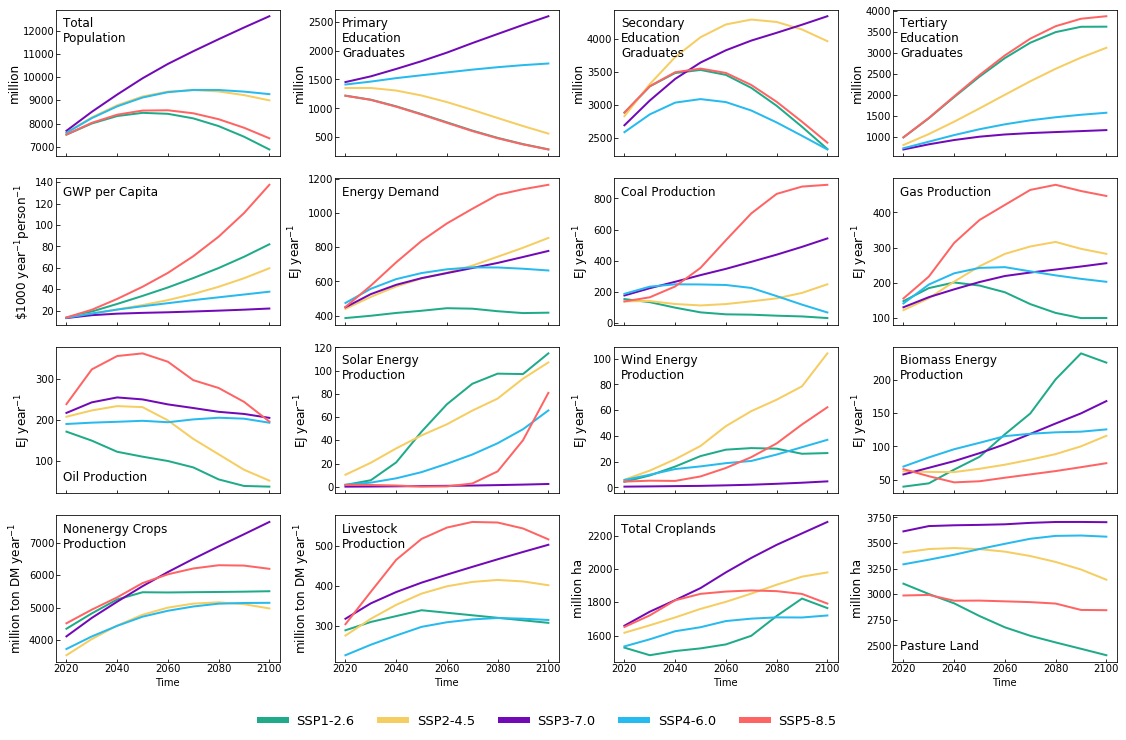

In [11]:
# Develop plots for the refernce values of energy demand and food production to use in the calibration section of SI.

from textwrap import wrap
from matplotlib.lines import Line2D

  
# Customise y-axis label names to include the units. 
y_labels = {'Total Population Indicator':'million', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'\$1000 $\mathregular{year^{-1} person^{-1}}$',
             'Energy Demand Indicator': 'EJ $\mathregular{year^{-1}}$',
             'Coal Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Gas Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Oil Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Solar Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Wind Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
            'Biomass Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Nonenergy Crops Production Indicator':'million ton DM $\mathregular{year^{-1}}$', 
              'Livestock Production Indicator':'million ton DM $\mathregular{year^{-1}}$',  
              'Total Croplands Indicator':'million ha', 
              'Pasture Land Indicator':'million ha'}

marker_model = {'SSP1-26': 'IMAGE','SSP2-45':'MESSAGE-GLOBIOM','SSP3-70':'AIM/CGE', 
                'SSP4-60':'GCAM4', 'SSP5-85':'REMIND-MAGPIE'}
marker_org = {'Total Population Indicator':'IIASA-WiC POP', 
             'Total Primary Education Graduates Indicator':'IIASA-WiC POP',
             'Total Secondary Education Graduates Indicator':'IIASA-WiC POP',
              'Total Tertiary Education Graduates Indicator':'IIASA-WiC POP', 
              'GWP per Capita Indicator':'OECD Env-Growth'}

ssp_names = {'SSP1-26': 'SSP1-2.6', 'SSP2-45': 'SSP2-4.5', 
             'SSP3-70': 'SSP3-7.0', 'SSP4-60': 'SSP4-6.0', 'SSP5-85': 'SSP5-8.5'}


# Customise plot titles
titles = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Production', 
              'Gas Production Indicator':'Gas Production', 
              'Oil Production Indicator':'Oil Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Nonenergy Crops Production Indicator':'Nonenergy Crops Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Total Croplands Indicator':'Total Croplands', 
              'Pasture Land Indicator':'Pasture Land'}

 
sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#7209b7', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

fig, axes = plt.subplots(4, 4, figsize=(19, 12), sharex='col')
fig.subplots_adjust(hspace=0.15, wspace=0.25)

j = 0
i = 0
for v, var in enumerate(list(y_labels.keys())):
    if j == 4:
        i += 1
        j = 0
    for s, sc in enumerate(scenarios):
        if var in list(marker_org.keys()):
            dict_var[var][sc].plot( 'Time', marker_org[var], ax=axes[i,j], marker='',
                                                         color=sc_colors[sc], linewidth=2)
        else:
            dict_var[var][sc].plot( 'Time', marker_model[sc], ax=axes[i,j], marker='',
                                                         color=sc_colors[sc], linewidth=2)
    axes[i,j].legend().set_visible(False)
    axes[i,j].set_ylabel(y_labels[var], size=12, labelpad=2)
    
    if var in ['Oil Production Indicator','Pasture Land Indicator']:
        y = .15
    else:
        y = .95
        
    axes[i,j].annotate('\n'.join(wrap(titles[var], 15)), size= 12, xy=(0.03, y), 
                       xycoords='axes fraction', ha='left', va='top')
    axes[i,j].tick_params(axis='both', direction='in', pad=2)
    j += 1

# Create a single legend for all subplots
legend_elements = [Line2D([0], [0], color=sc_colors[sc], lw=6, alpha=1, label=ssp_names[sc]) for sc in scenarios]

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles=legend_elements, loc='upper left', ncol=5, fontsize=13, 
           bbox_to_anchor=(0.27, 0.07), frameon=False, borderaxespad=0, bbox_transform=fig.transFigure)

plt.savefig('{}/SSPs_assumption_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_assumption_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 


## Load FeliX projections (experiments)

In [12]:
# Import Felix model generated projections under uncertainty to show bands instead of lines. 
from ema_workbench import load_results
directory = 'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Results/Exploration_results/'
dict_sc_felix = {}
dict_sc_felix_g = {}
for i in scenarios:  
    results = load_results(directory+'SDG_{}_exploration_sc10000.tar.gz'.format(i))
    experiments, outcomes = results
    dict_sc_felix[i] = outcomes # for all plotting except changes needed under green growth 
    dict_sc_felix_g[i] = outcomes # for plotting changes needed under the green growth

In [62]:
dict_sc_felix_g['SSP1-26']

{'TIME': array([[1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        ...,
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.],
        [1900., 1901., 1902., ..., 2098., 2099., 2100.]]),
 'Cereal Yield': array([[ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.188534  ,
         11.24396   , 11.299251  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 10.450304  ,
         10.496298  , 10.542251  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.716425  ,
         11.776306  , 11.836038  ],
        ...,
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.33598   ,
         11.393381  , 11.450654  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 10.994808  ,
         11.04513   , 11.095323  ],
        [ 0.65634   ,  0.68569094,  0.7188353 , ..., 11.277934  ,
         11.3351965 , 11.39231

## Plot FeliX vs other IAM projections (main text)

In [13]:
outcomes_dict = {}
for i in scenarios:
    # Delete other output indicators and keep only those used for SSP calibration. We do not plot 'Urban Industrial Land Indicator' for calibration. 
    unwanted = set(list(dict_sc_felix[i].keys())) - set(new_keys+['TIME'])
    for unwanted_key in unwanted: del dict_sc_felix[i][unwanted_key]
        
    # Flatten 2D arrays in outcomes[indicator] to 1D array and create a long-format dataframe for plotting the uncertainty
    # Why we convert outcomes to long-format dataframe? because it's the accepted format of sns.lineplot which draws uncertainty
    outcomes_df = pd.DataFrame(columns=list(dict_sc_felix[i].keys()))
    for key in set(list(dict_sc_felix[i].keys())): 
        outcomes_df[key] = dict_sc_felix[i][key][:, 120:].ravel() # Specify from when to plot the data 
    outcomes_dict[i] = outcomes_df
    

In [64]:
outcomes_dict['SSP1-26']

TIME  Pasture Land Indicator  Total Croplands Indicator  \
0       2020.0               3288.9966                  1608.6964   
1       2021.0               3294.7030                  1611.4875   
2       2022.0               3299.4148                  1613.7921   
3       2023.0               3303.1252                  1615.6070   
4       2024.0               3305.9175                  1616.9727   
...        ...                     ...                        ...   
809995  2096.0               2825.3916                  1381.9404   
809996  2097.0               2819.3372                  1378.9791   
809997  2098.0               2813.1980                  1375.9763   
809998  2099.0               2806.9746                  1372.9325   
809999  2100.0               2800.6700                  1369.8488   

        Solar Energy Production Indicator  Wind Energy Production Indicator  \
0                                3.662521                          1.228411   
1                                4.019471                          2.414289   
2                                4.386121                          3.546579   
3                                4.758874                          4.596621   
4                                5.132863                          5.085182   
...                                   ...                               ...   
809995                         123.759450                         36.027090   
809996                         124.911865                         36.805557   
809997                         125.955770                         37.593400   
809998                         126.890460                         38.390320   
809999                         127.715530                         39.195910   

        Biomass Energy Production Indicator  Oil Production Indicator  \
0                                 25.585611                196.976170   
1                                 26.053623                197.224330   
2                                 26.512436                196.777940   
3                                 26.991116                195.393690   
4                                 27.497215                191.438570   
...                                     ...                       ...   
809995                           229.807110                 24.416914   
809996                           226.040730                 23.531742   
809997                           222.207930                 22.677969   
809998                           218.318970                 21.854588   
809999                           214.383640                 21.060602   

        Gas Production Indicator  Coal Production Indicator  \
0                     169.933070                 144.715450   
1                     172.563960                 146.898860   
2                     175.059230                 149.064130   
3                     177.726580                 150.928960   
4                     180.941500                 150.496030   
...                          ...                        ...   
809995                 36.310116                  20.512098   
809996                 34.676495                  19.604881   
809997                 33.119465                  18.740177   
809998                 31.635553                  17.915998   
809999                 30.221403                  17.130434   

        Forest Land Indicator  Total Population Indicator  \
0                   3960.9075                   7571.2590   
1                   3952.1726                   7657.9230   
2                   3944.8806                   7740.8203   
3                   3939.0388                   7820.0835   
4                   3934.5112                   7895.8413   
...                       ...                         ...   
809995              4417.7407                   6673.6255   
809996              4426.0474                   6593.2560   
809997              4434.4770                   6

In [79]:
# Prapre the datasets for plotting FeliX projections against SSP model projections

from textwrap import wrap
from collections import OrderedDict
from matplotlib.lines import Line2D
import matplotlib as mpl


# Combine FeliX projections across all renewable sources, all fossil sources,  all food production, and all agricultural land
renewable = ['Solar Energy Production Indicator', 'Wind Energy Production Indicator', 'Biomass Energy Production Indicator']
fossil = ['Oil Production Indicator', 'Gas Production Indicator', 'Coal Production Indicator']
food = ['Nonenergy Crops Production Indicator', 'Livestock Production Indicator']
agriland = ['Total Croplands Indicator', 'Pasture Land Indicator']

for s in scenarios:
    outcomes_dict[s]['Renewable Energy Production Indicator'] = outcomes_dict[s][renewable].sum(axis=1)
    outcomes_dict[s]['Fossil Energy Production Indicator'] = outcomes_dict[s][fossil].sum(axis=1)
    outcomes_dict[s]['Food Production Indicator'] = outcomes_dict[s][food].sum(axis=1)
    outcomes_dict[s]['Agricultural Lands Indicator'] = outcomes_dict[s][agriland].sum(axis=1)

    
    
# Combine SSP model projections across all renewable sources, all fossil sources,  all food production, and all agricultural land
new_var = ['Renewable Energy Production Indicator', 'Fossil Energy Production Indicator', 
          'Food Production Indicator', 'Agricultural Lands Indicator']
for v in new_var:
    dict_var[v] = {}
for s in scenarios:
    dict_var[new_var[0]][s] = (dict_var['Solar Energy Production Indicator'][s] 
                                                            + dict_var['Wind Energy Production Indicator'][s] 
                                                            + dict_var['Biomass Energy Production Indicator'][s])
    dict_var[new_var[0]][s]['Time'] = dict_var[new_var[0]][s]['Time']/3
    
    dict_var[new_var[1]][s] = (dict_var['Coal Production Indicator'][s] 
                                                            + dict_var['Gas Production Indicator'][s] 
                                                            + dict_var['Oil Production Indicator'][s])
    dict_var[new_var[1]][s]['Time'] = dict_var[new_var[1]][s]['Time']/3
    dict_var[new_var[2]][s] = (dict_var['Nonenergy Crops Production Indicator'][s] 
                                                            + dict_var['Livestock Production Indicator'][s] )
    dict_var[new_var[2]][s]['Time'] = dict_var[new_var[2]][s]['Time']/2
    dict_var[new_var[3]][s] = (dict_var['Total Croplands Indicator'][s] 
                                                            + dict_var['Pasture Land Indicator'][s])
    dict_var[new_var[3]][s]['Time'] = dict_var[new_var[3]][s]['Time']/2

        

# Create subplots title, colours, and units.
ssp_names = {'SSP1-26': 'Green recovery (SSP 1)', 'SSP2-45': 'Business as usual (SSP 2)', 
             'SSP3-70': 'Fragmented world (SSP 3)', 'SSP4-60': 'Inequality (SSP 4)', 'SSP5-85': 'Fossil-fueled development (SSP 5)'}

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

unit_keys = {'Total Population Indicator':'million', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'\$1000 $\mathregular{year^{-1} person^{-1}}$',
             'Renewable Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
             'Fossil Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Energy Demand Indicator': 'EJ $\mathregular{year^{-1}}$',
             'Coal Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Gas Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Oil Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Solar Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
              'Wind Energy Production Indicator':'EJ $\mathregular{year^{-1}}$', 
            'Biomass Energy Production Indicator':'EJ $\mathregular{year^{-1}}$',
             'Food Production Indicator':'million ton DM $\mathregular{year^{-1}}$',
             'Nonenergy Crops Production Indicator':'million ton DM $\mathregular{year^{-1}}$', 
              'Livestock Production Indicator':'million ton DM $\mathregular{year^{-1}}$',  
             'Agricultural Lands Indicator':'million ha', 
             'Total Croplands Indicator':'million ha', 
             'Forest Land Indicator':'million ha', 
              'Pasture Land Indicator':'million ha', 
              'CO2 Radiative Forcing Indicator': 'W $\mathregular{m^{-2}}$',
             'Total CO2 Emissions Indicator': 'Gt CO2 $\mathregular{year^{-1}}$'}


title_keys = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Renewable Energy Production Indicator':'Total Renewable Energy Production', 
             'Fossil Energy Production Indicator':'Total Fossil Energy Production', 
              'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Energy Production', 
              'Gas Production Indicator':'Gas Energy Production', 
              'Oil Production Indicator':'Oil Energy Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Food Production Indicator':'Total Food Production',
              'Nonenergy Crops Production Indicator':'Nonenergy Crops Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Agricultural Lands Indicator':'Total Agricultural Land Area',
              'Total Croplands Indicator':'Cropland Area', 
             'Forest Land Indicator':'Forest Land Cover', 
              'Pasture Land Indicator':'Pasture Land Cover', 
              'CO2 Radiative Forcing Indicator': 'Radiative Forcing from CO2',
             'Total CO2 Emissions Indicator': 'Total CO2 Emissions'}

sector_key = {'Total Population Indicator':'SE', 
             'Total Primary Education Graduates Indicator':'SE',
             'Total Secondary Education Graduates Indicator':'SE',
              'Total Tertiary Education Graduates Indicator':'SE', 
              'GWP per Capita Indicator':'SE',
             'Renewable Energy Production Indicator':'E', 
             'Fossil Energy Production Indicator':'E', 
              'Energy Demand Indicator': 'E',
             'Coal Production Indicator':'E', 
              'Gas Production Indicator':'E', 
              'Oil Production Indicator':'E', 
              'Solar Energy Production Indicator':'E', 
              'Wind Energy Production Indicator':'E', 
            'Biomass Energy Production Indicator':'E',
             'Food Production Indicator':'L&F',
              'Nonenergy Crops Production Indicator':'L&F', 
              'Livestock Production Indicator':'L&F',  
              'Agricultural Lands Indicator':'L&F',
              'Total Croplands Indicator':'L&F', 
             'Forest Land Indicator':'L&F', 
              'Pasture Land Indicator':'L&F', 
              'CO2 Radiative Forcing Indicator': 'C',
             'Total CO2 Emissions Indicator': 'C'}

label_key = {'Total Population Indicator':'s', 
             'Total Primary Education Graduates Indicator':'s',
             'Total Secondary Education Graduates Indicator':'s',
              'Total Tertiary Education Graduates Indicator':'s', 
              'GWP per Capita Indicator':'s',
             'Renewable Energy Production Indicator':'e', 
             'Fossil Energy Production Indicator':'e', 
              'Energy Demand Indicator': 'e',
             'Coal Production Indicator':'e', 
              'Gas Production Indicator':'e', 
              'Oil Production Indicator':'e', 
              'Solar Energy Production Indicator':'e', 
              'Wind Energy Production Indicator':'e', 
            'Biomass Energy Production Indicator':'e',
             'Food Production Indicator':'l',
              'Nonenergy Crops Production Indicator':'l', 
              'Livestock Production Indicator':'l',  
              'Agricultural Lands Indicator':'l',
              'Total Croplands Indicator':'l', 
             'Forest Land Indicator':'l', 
              'Pasture Land Indicator':'l', 
              'CO2 Radiative Forcing Indicator': 'c',
             'Total CO2 Emissions Indicator': 'c'}


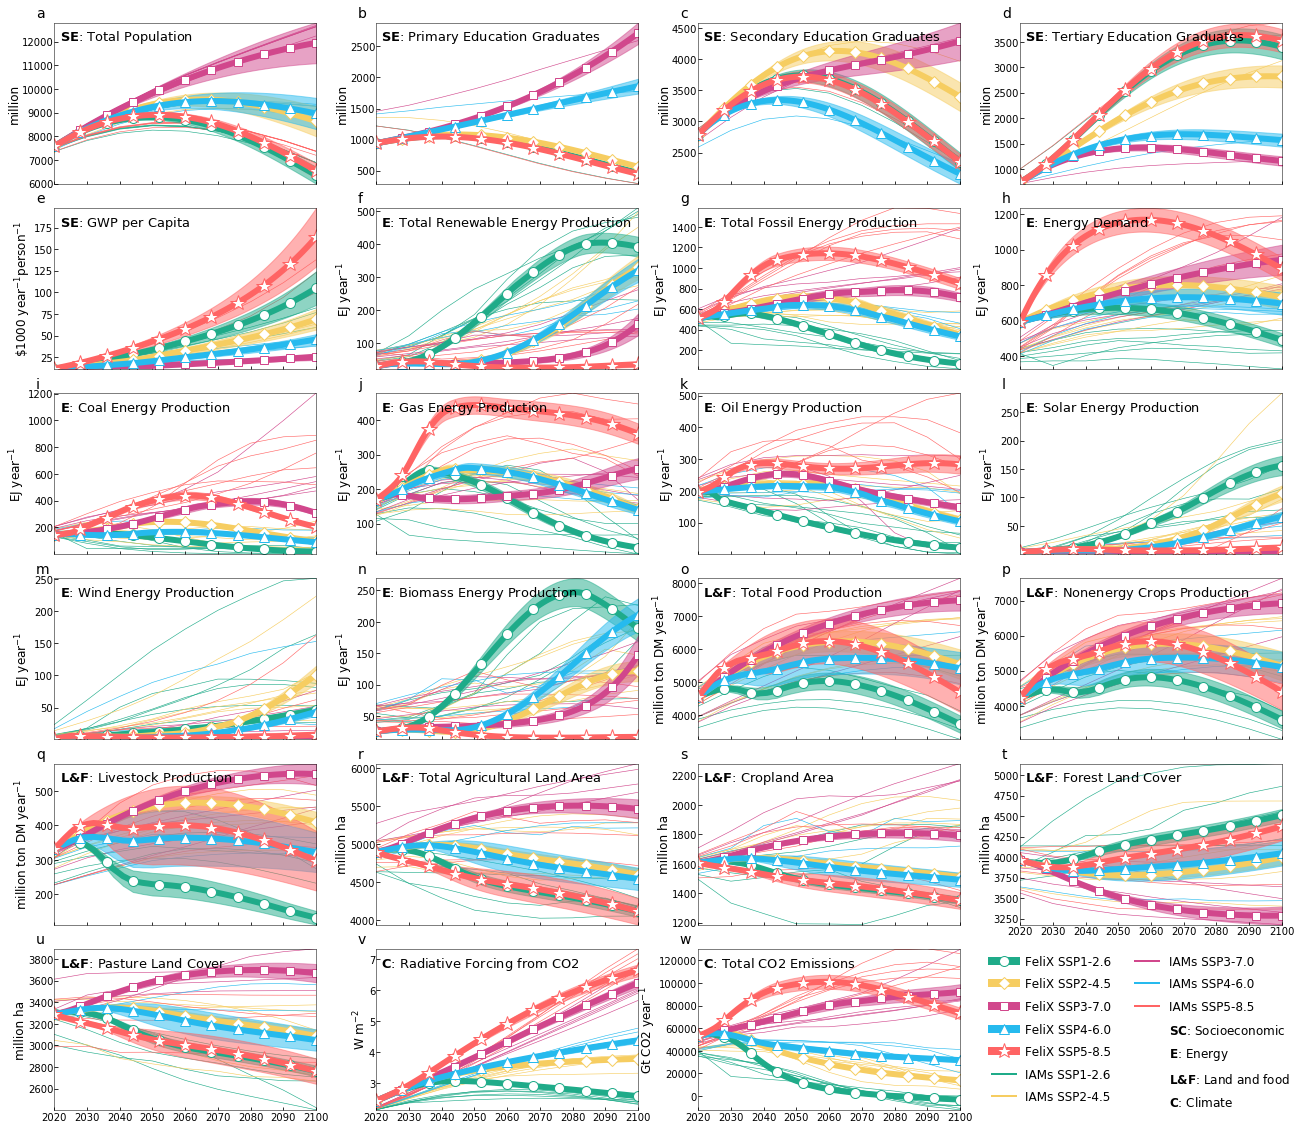

In [124]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(22, 20))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 6
fig_cols = 4

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.15, wspace=0.23, width_ratios=[1,1,1,1])

ax = {}

# Create the reference axes for subplots.
for i in range(fig_rows):
    for j in range(fig_cols):
        ax[i,j] = fig.add_subplot(grid[i, j])
        ax[i,j].tick_params(axis='y', direction='in', pad=1, labelsize=10)
        if (i == 5) and (j in [0,1,2,3]):
            lb = True
        elif (i == 4) and (j == 3):
            lb = True
        else:
            lb = False
        ax[i,j].tick_params(axis='x', direction='in', pad=2, labelbottom=lb, labelsize=10)
ax[5,3].axis('off')
        
'''# Create axes for 
ax[0,0] = fig.add_subplot(grid[0:3,0])
ax[1,0] = fig.add_subplot(grid[3:7,0])
ax[2,0] = fig.add_subplot(grid[7:10,0])
ax[3,0] = fig.add_subplot(grid[10:13,0])'''

    

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["o", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["D", 8, 1, 'white', '#f6cd61'],
 'SSP3-70':["s", 8, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 10, 1, '#26baee', '#26baee'],
 'SSP5-85':["*", 16, 1, '#ff6464', '#ff6464']
 }

calib_vars = list(sector_key.keys())
#calib_vars = ['Total Population Indicator',]

label_list = list(string.ascii_lowercase)

i = 0
j = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        '''# Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        elif i in [1, 7]:
            markersize=9
            linewidth=6
            markeredgewidth=1.25
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5'''
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i,j], 
                     marker=markers[sc][0], markersize=markers[sc][1], markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markers[sc][2], markevery=8,
                     linewidth=6, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                dict_var[var][sc].plot( 'Time', model, ax=ax[i,j],color=sc_colors[sc], linewidth=.6,zorder=-100)
        
        ax[i,j].set_ylabel('\n'.join(wrap(unit_keys[var], 50)), labelpad=1, fontsize=12)  

        ax[i,j].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 
    ax[i,j].set_title(r"$\bf{" + sector_key[var] + "}$" + ": " + title_keys[var], fontsize=13, color='black', 
                      pad=6, loc='left', x=0.02, y=0.85) 
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i,j].margins(x=0)
    ax[i,j].margins(y=0)
    ax[i,j].xaxis.label.set_visible(False)
    
    # Add all subplot labels
    ax[i,j].annotate(label_list[v], size= 14, weight='normal', xy=(-0.07, 1.1), xycoords='axes fraction', ha='left', va='top')
    
    j += 1
    if j == 4:
        i += 1
        j = 0



# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=1, label='FeliX SSP1-2.6', 
                          marker=markers['SSP1-26'][0], markersize=markers['SSP1-26'][1], markerfacecolor='white', markeredgecolor='#1fab89', markeredgewidth=1), 
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=1, label='FeliX SSP2-4.5',
                          marker=markers['SSP2-45'][0], markersize=markers['SSP2-45'][1], markerfacecolor='white', markeredgecolor='#f6cd61', markeredgewidth=1),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=1, label='FeliX SSP3-7.0',
                          marker=markers['SSP3-70'][0], markersize=markers['SSP3-70'][1], markerfacecolor='white', markeredgecolor='#d1478c', markeredgewidth=1),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=1, label='FeliX SSP4-6.0',
                          marker=markers['SSP4-60'][0], markersize=markers['SSP4-60'][1], markerfacecolor='white', markeredgecolor='#26baee', markeredgewidth=1),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=1, label='FeliX SSP5-8.5',
                          marker=markers['SSP5-85'][0], markersize=markers['SSP5-85'][1], markerfacecolor='white', markeredgecolor='#ff6464', markeredgewidth=1),

                   Line2D([0], [0], marker="", color='#1fab89', lw=2, label='IAMs SSP1-2.6'),
                   Line2D([0], [0], marker="", color='#f6cd61', lw=2,label='IAMs SSP2-4.5'),
                   Line2D([0], [0], marker="", color='#d1478c', lw=2,label='IAMs SSP3-7.0'),
                   Line2D([0], [0], marker="", color='#26baee', lw=2,label='IAMs SSP4-6.0'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=2,label='IAMs SSP5-8.5'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label= r"$\bf{" + 'SC' + "}$" + ': Socioeconomic'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'E' + "}$" + ': Energy'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'L&F' + "}$" + ': Land and food'),
                   Line2D([0], [0], marker="", color='#ff6464', lw=0,label=r"$\bf{" + 'C' + "}$" + ': Climate')      
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.71, .24),  
           bbox_transform=fig.transFigure, ncol=2, fontsize=12, labelspacing=.8, frameon=False)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 

plt.show()

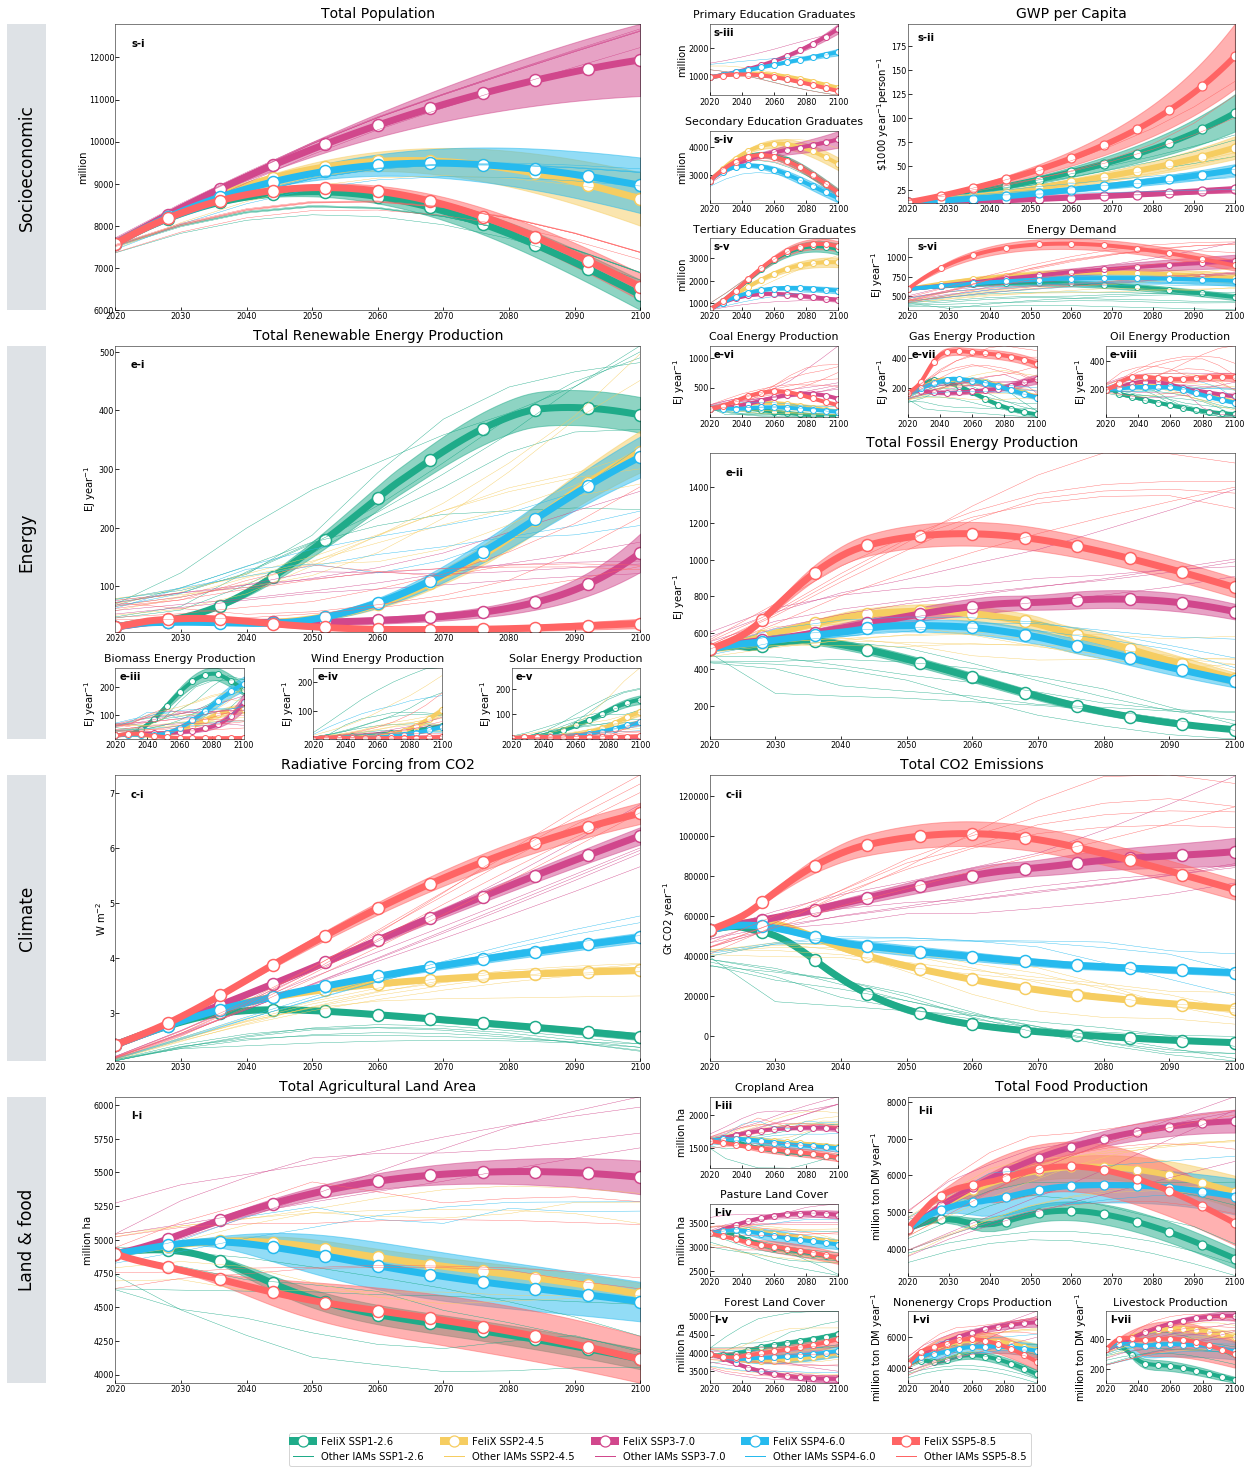

In [95]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(22, 25))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.6, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

for i in range(27):
    ax[i].tick_params(axis='y', direction='in', pad=1, labelsize=8)
    ax[i].tick_params(axis='x', direction='in', pad=2, labelsize=8)

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator', 
              'GWP per Capita Indicator',
            'Renewable Energy Production Indicator', 
            'Fossil Energy Production Indicator', 
            'CO2 Radiative Forcing Indicator', 
            'Total CO2 Emissions Indicator', 
            'Agricultural Lands Indicator',
            'Food Production Indicator', 
            'Total Primary Education Graduates Indicator',
            'Total Secondary Education Graduates Indicator',
            'Total Tertiary Education Graduates Indicator', 
            'Energy Demand Indicator', 
            'Biomass Energy Production Indicator',
            'Wind Energy Production Indicator',
            'Solar Energy Production Indicator',
            'Coal Production Indicator' ,
            'Gas Production Indicator',
            'Oil Production Indicator',
            'Total Croplands Indicator',
            'Pasture Land Indicator',
            'Forest Land Indicator', 
            'Nonenergy Crops Production Indicator' ,
            'Livestock Production Indicator'   
            ]

i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        # Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        elif i in [1, 7]:
            markersize=9
            linewidth=6
            markeredgewidth=1.25
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], 
                     marker='o', markersize=markersize, markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markeredgewidth, markevery=8,
                     linewidth=linewidth, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i],  
                                                                 color=sc_colors[sc], linewidth=.4
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], 
                                                             color=sc_colors[sc], linewidth=.4
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 50)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        



# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=1, label='FeliX SSP1-2.6', 
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#1fab89', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#1fab89', lw=1, label='Other IAMs SSP1-2.6'),
                   
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=1, label='FeliX SSP2-4.5',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#f6cd61', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#f6cd61', lw=1,label='Other IAMs SSP2-4.5'),
                   
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=1, label='FeliX SSP3-7.0',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#d1478c', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#d1478c', lw=1,label='Other IAMs SSP3-7.0'),
                   
                   Line2D([0], [0], color='#26baee', lw=8, alpha=1, label='FeliX SSP4-6.0',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#26baee', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#26baee', lw=1,label='Other IAMs SSP4-6.0'),
                   
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=1, label='FeliX SSP5-8.5',
                          marker='o', markersize=11, markerfacecolor='white', markeredgecolor='#ff6464', markeredgewidth=1.25),
                   Line2D([0], [0], marker="", color='#ff6464', lw=1,label='Other IAMs SSP5-8.5')   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.3, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 

plt.show()

## Archive

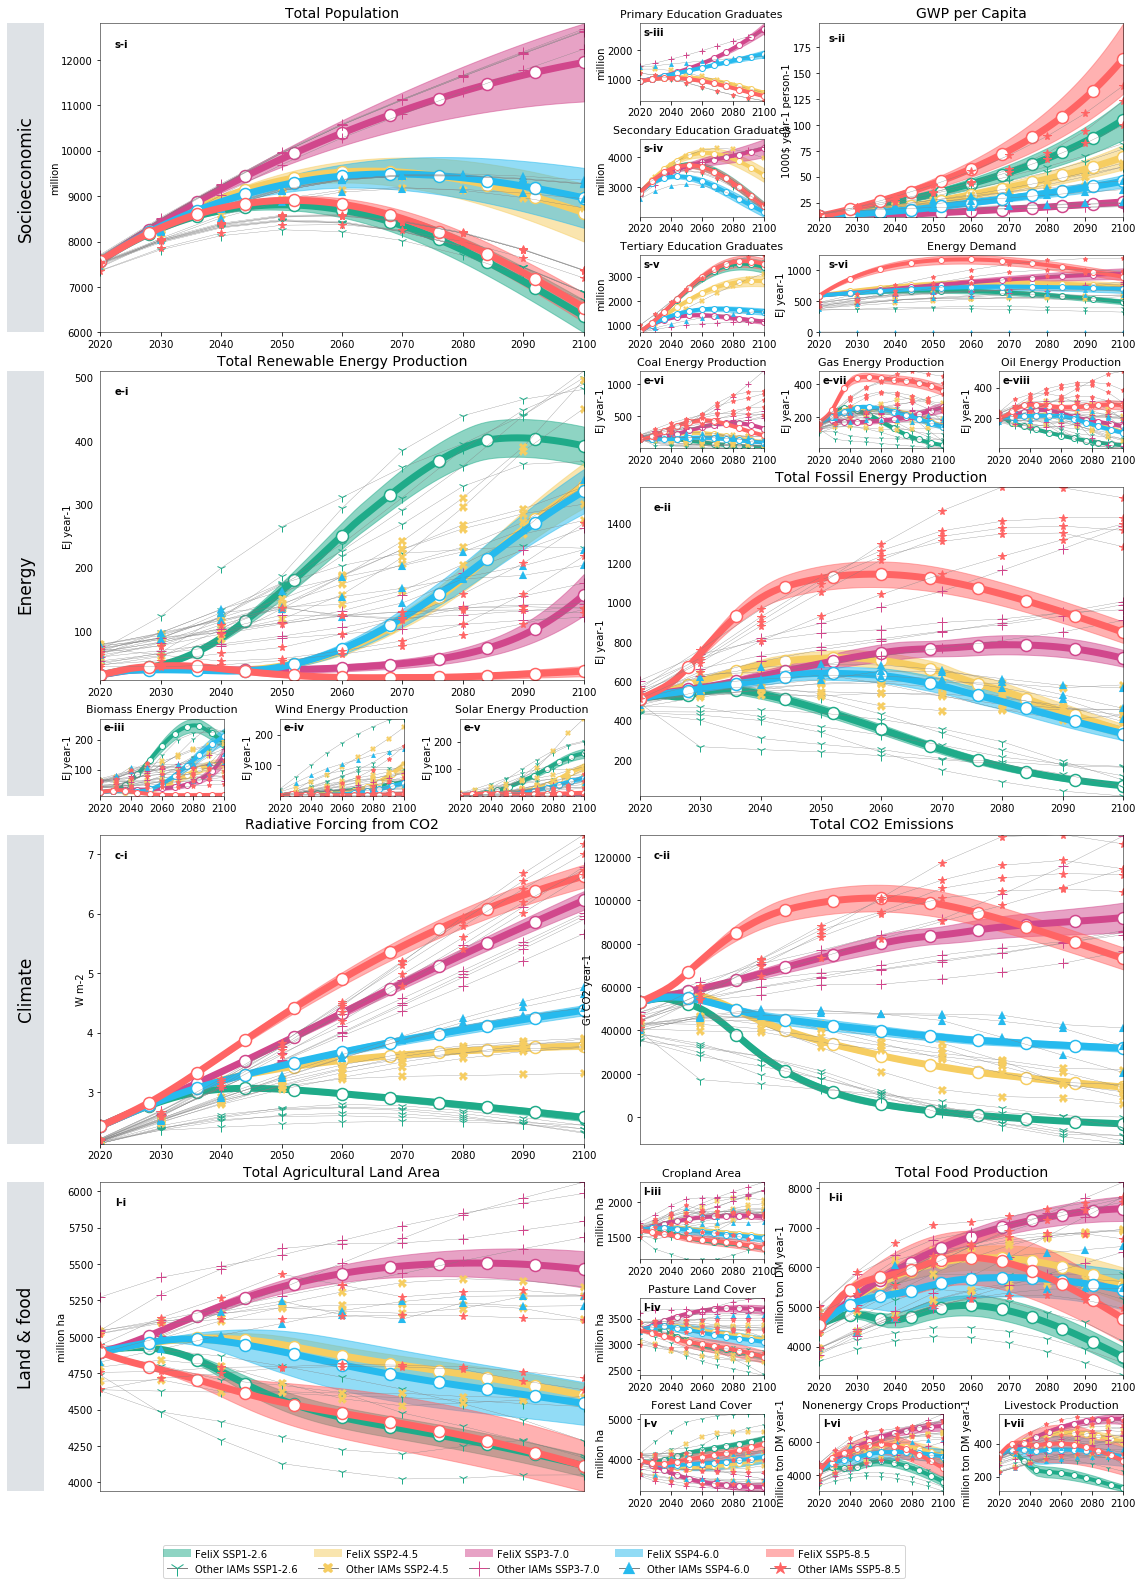

In [248]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(20, 27))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.5, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator', 
              'GWP per Capita Indicator',
            'Renewable Energy Production Indicator', 
            'Fossil Energy Production Indicator', 
            'CO2 Radiative Forcing Indicator', 
            'Total CO2 Emissions Indicator', 
            'Agricultural Lands Indicator',
            'Food Production Indicator', 
            'Total Primary Education Graduates Indicator',
            'Total Secondary Education Graduates Indicator',
            'Total Tertiary Education Graduates Indicator', 
            'Energy Demand Indicator', 
            'Biomass Energy Production Indicator',
            'Wind Energy Production Indicator',
            'Solar Energy Production Indicator',
            'Coal Production Indicator' ,
            'Gas Production Indicator',
            'Oil Production Indicator',
            'Total Croplands Indicator',
            'Pasture Land Indicator',
            'Forest Land Indicator', 
            'Nonenergy Crops Production Indicator' ,
            'Livestock Production Indicator'   
            ]
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        
        # Change the size of marker for smaller plots. 7 is the number of large subplots
        if i > 7:
            markersize=6
            linewidth=4
            markeredgewidth=1
        else:
            markersize=12
            linewidth=7
            markeredgewidth=1.5
            
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], 
                     marker='o', markersize=markersize, markerfacecolor='white', markeredgecolor = sc_colors[sc], 
                     markeredgewidth=markeredgewidth, markevery=8,
                     linewidth=linewidth, color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        

# Removing ticks for inner plots                
for i in [6,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)

# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=.5, label='FeliX SSP1-2.6'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='Other IAMs SSP1-2.6', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=.5, label='FeliX SSP2-4.5'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='Other IAMs SSP2-4.5', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=.5, label='FeliX SSP3-7.0'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='Other IAMs SSP3-7.0', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=.5, label='FeliX SSP4-6.0'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='Other IAMs SSP4-6.0', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=.5, label='FeliX SSP5-8.5'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='Other IAMs SSP5-8.5', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

#plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.svg'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight')

plt.show()

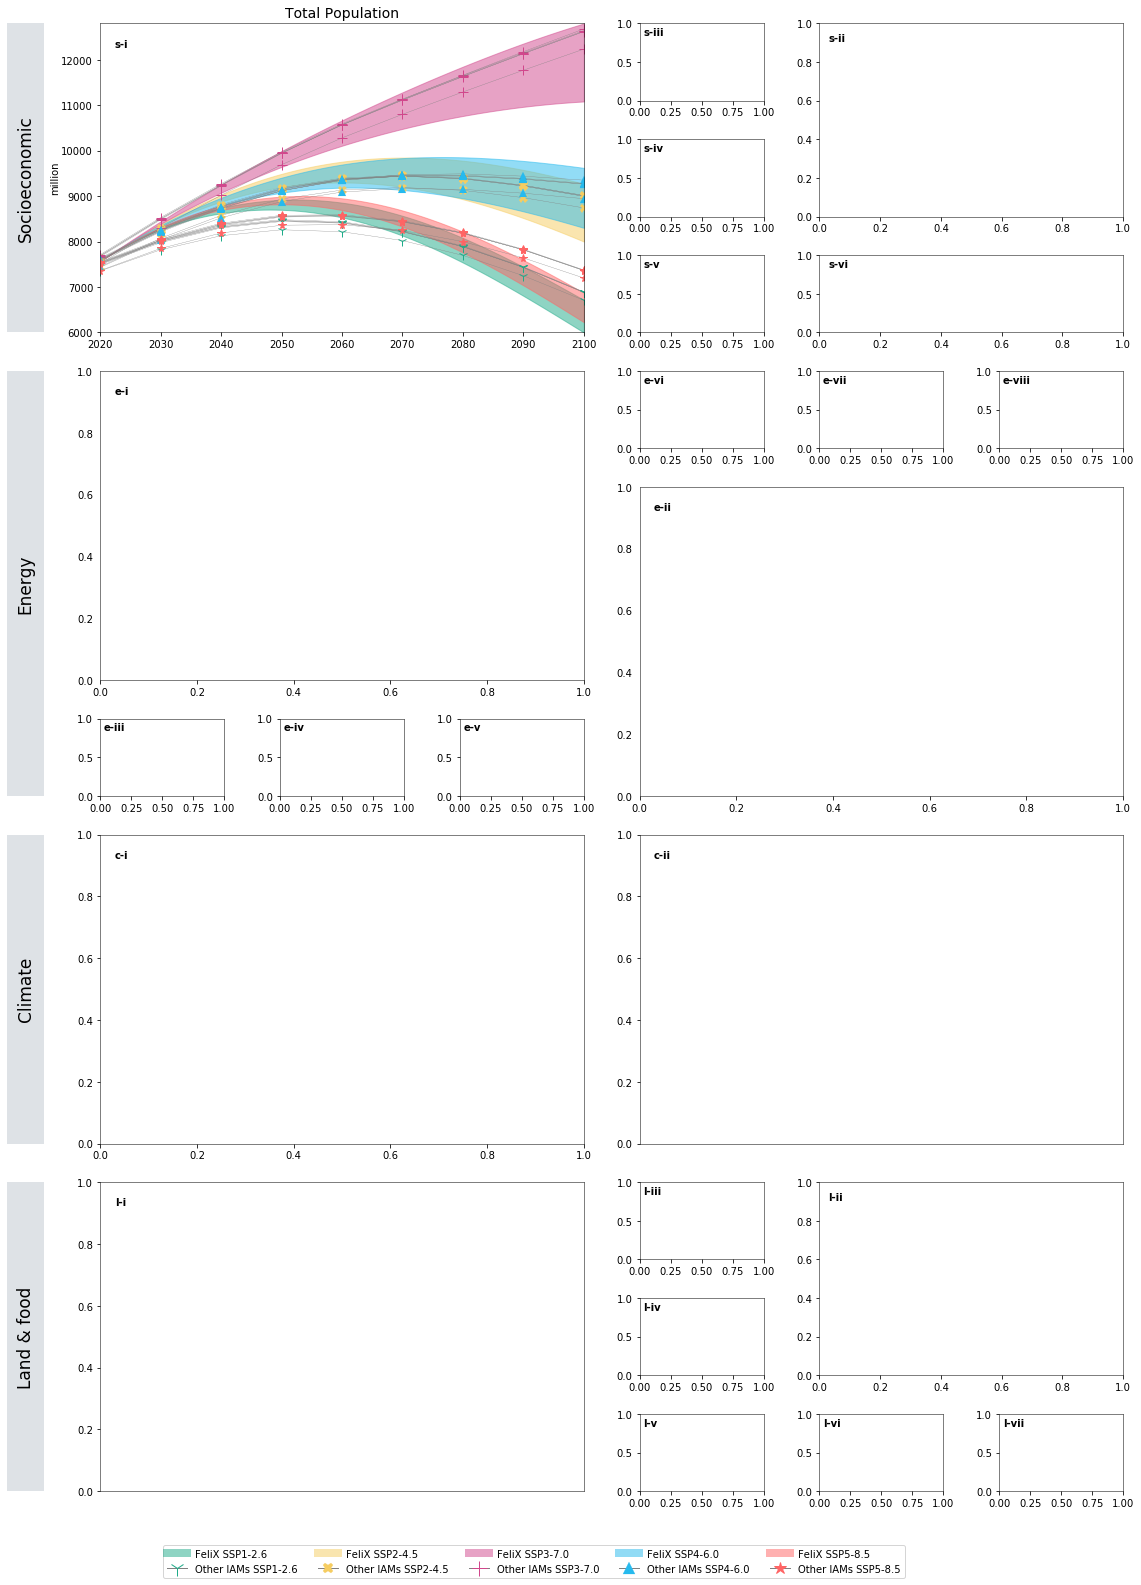

In [237]:
# Develop the  summary calibration plots 

import string

fig = plt.figure(figsize=(20, 27))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 13
fig_cols = 7

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.5, wspace=0.5, width_ratios=[.3,1,1,1,1,1,1])

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:3, 1:4])
ax[1] = fig.add_subplot(grid[0:2,5:7])
ax[2] = fig.add_subplot(grid[3:6,1:4])
ax[3] = fig.add_subplot(grid[4:7,4:7])
ax[4] = fig.add_subplot(grid[7:10,1:4])
ax[5] = fig.add_subplot(grid[7:10,4:7])
ax[6] = fig.add_subplot(grid[10:13,1:4])
ax[7] = fig.add_subplot(grid[10:12,5:7])
ax[8] = fig.add_subplot(grid[0,4])
ax[9] = fig.add_subplot(grid[1,4])
ax[10] = fig.add_subplot(grid[2,4])
ax[11] = fig.add_subplot(grid[2,5:7])
ax[12] = fig.add_subplot(grid[6,1])
ax[13] = fig.add_subplot(grid[6,2])
ax[14] = fig.add_subplot(grid[6,3])
ax[15] = fig.add_subplot(grid[3,4])
ax[16] = fig.add_subplot(grid[3,5])
ax[17] = fig.add_subplot(grid[3,6])
ax[18] = fig.add_subplot(grid[10,4])
ax[19] = fig.add_subplot(grid[11,4])
ax[20] = fig.add_subplot(grid[12,4])
ax[21] = fig.add_subplot(grid[12,5])
ax[22] = fig.add_subplot(grid[12,6])
ax[23] = fig.add_subplot(grid[0:3,0])
ax[24] = fig.add_subplot(grid[3:7,0])
ax[25] = fig.add_subplot(grid[7:10,0])
ax[26] = fig.add_subplot(grid[10:13,0])

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }

calib_vars = ['Total Population Indicator'
              ]
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], marker='o', linewidth=2, 
                     color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                
                # Change the size of marker for smaller plots. 7 is the number of large subplots
                if i > 7:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)), labelpad=1)  

        ax[i].legend().set_visible(False)

    # Set the title and change the title font size of in smaller plots. 7 is the number of large subplots
    if i > 7:
        ax[i].set_title(title_keys[var], fontsize=11, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].set_title(title_keys[var], fontsize=14, color='black', pad=6) 
        #ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
    ax[i].xaxis.label.set_visible(False)
    
    i+= 1

# Add all subplot labels
fig_sc = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii']
for n, i in enumerate([0,1,8,9,10,11]):
    ax[i].annotate('s'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([2,3,12,13,14,15,16,17]):
    ax[i].annotate('e'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([4,5]):
    ax[i].annotate('c'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
for n, i in enumerate([6,7,18,19,20,21,22]):
    ax[i].annotate('l'+fig_sc[n], size= 10, weight='semibold', xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
        

# Removing ticks for inner plots                
for i in [6,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)

# Draw side title for group subplots
for i, c in enumerate(['Socioeconomic', 'Energy', 'Climate', 'Land & food']):
    ax[i+23].set_facecolor('#dee2e6')
    ax[i+23].spines['top'].set_visible(False)
    ax[i+23].spines['right'].set_visible(False)
    ax[i+23].spines['bottom'].set_visible(False)
    ax[i+23].spines['left'].set_visible(False)
    ax[i+23].get_xaxis().set_ticks([])
    ax[i+23].get_yaxis().set_ticks([])
    ax[i+23].annotate(c, size= 17, weight='regular', xy=(0.5, .5), rotation=90, xycoords='axes fraction', ha='center', va='center')

    
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=.5, label='FeliX SSP1-2.6'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='Other IAMs SSP1-2.6', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=.5, label='FeliX SSP2-4.5'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='Other IAMs SSP2-4.5', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=.5, label='FeliX SSP3-7.0'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='Other IAMs SSP3-7.0', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=.5, label='FeliX SSP4-6.0'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='Other IAMs SSP4-6.0', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=.5, label='FeliX SSP5-8.5'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='Other IAMs SSP5-8.5', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .1),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

#plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_EF.svg'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight')

plt.show()

## Plot changes needed under a green growth (main text)

In [21]:
# Import Felix model generated projections under uncertainty to show bands instead of lines. 
from ema_workbench import load_results
directory = 'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Results/Exploration_results/'
dict_sc_felix = {}
dict_sc_felix_g = {}
for i in scenarios:  
    results = load_results(directory+'SDG_{}_exploration_sc10000.tar.gz'.format(i))
    experiments, outcomes = results
    dict_sc_felix_g[i] = outcomes # for plotting changes needed under the green growth

In [22]:
wanted_keys = set(['Total Population Indicator', 'GWP per Capita Indicator',
                   'Population with No or Incomplete Education Indicator', 'Energy Demand Indicator', 
                   'Fossil Energy Production Indicator', 'Agricultural Land Area', 
                   'Animal Food Caloric Intake Indicator', 'Livestock Production Indicator', 
                   'TIME'])
dict_sc_felix3 = {}
outcomes_dict2 = {}
for i in ['SSP1-26', 'SSP2-45']: #, 'SSP2', 'SSP3', 'SSP4','SSP5'
    # Delete other output indicators and keep only those used for SSP calibration. We do not plot 'Urban Industrial Land Indicator' for calibration. 
    dict_sc_felix3[i] = dict_sc_felix_g[i]
    unwanted = set(list(dict_sc_felix3[i].keys())) - wanted_keys
    for unwanted_key in unwanted: del dict_sc_felix3[i][unwanted_key]
        
    # Flatten 2D arrays in outcomes[indicator] to 1D array and create a long-format dataframe for plotting the uncertainty
    # Why we convert outcomes to long-format dataframe? because it's the accepted format of sns.lineplot which draws uncertainty
    outcomes_df2 = pd.DataFrame(columns=list(dict_sc_felix3[i].keys()))
    for key in set(list(dict_sc_felix3[i].keys())): 
        outcomes_df2[key] = dict_sc_felix3[i][key][:, 100:].ravel() # Specify from when to plot the data 
    outcomes_dict2[i] = outcomes_df2
    
    # Correct the units for visualtion. Total Population from million to billion; GWP from 1000 to 10000; Livestock Production from million t DM to billion t DM;Agricultural Land from million ha to billion ha 
    outcomes_dict2[i]['Total Population Indicator'] = outcomes_dict2[i]['Total Population Indicator']/1000
    outcomes_dict2[i]['GWP per Capita Indicator'] = outcomes_dict2[i]['GWP per Capita Indicator']/10
    outcomes_dict2[i]['Livestock Production Indicator'] = outcomes_dict2[i]['Livestock Production Indicator']/1000
    outcomes_dict2[i]['Agricultural Land Area'] = outcomes_dict2[i]['Agricultural Land Area']/1000


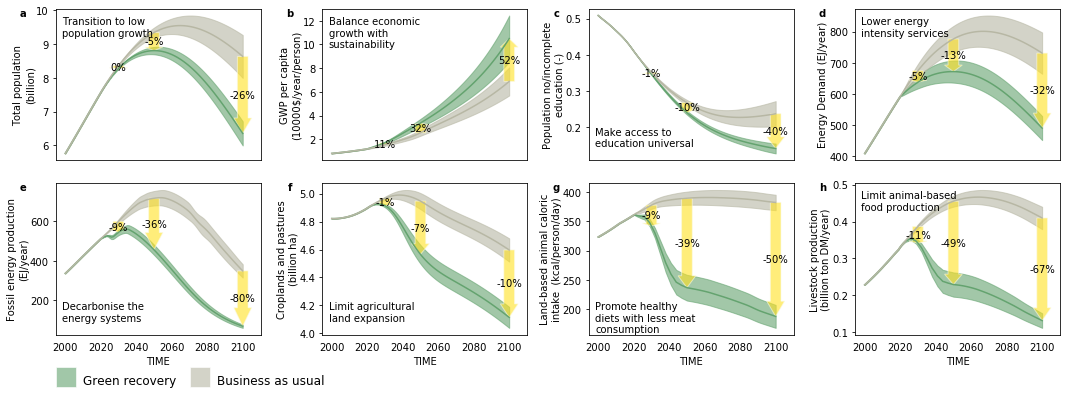

In [23]:
# Ploting Felix SSP projections across outcome variables.
from textwrap import wrap
import matplotlib.patches as patches
import string
from matplotlib.lines import Line2D


# Customise y-axis label names to include the units
y_labels = {'Total Population Indicator':'Total population (billion)', 
            'GWP per Capita Indicator': 'GWP per capita (10000$/year/person)',
            'Population with No or Incomplete Education Indicator':'Population no/incomplete education (-)', 
            'Energy Demand Indicator': 'Energy Demand (EJ/year)', 
            'Fossil Energy Production Indicator':'Fossil energy production (EJ/year)',  
            'Agricultural Land Area':'Croplands and pastures (billion ha)',
            'Animal Food Caloric Intake Indicator': 'Land-based animal caloric intake  (kcal/person/day)', 
            'Livestock Production Indicator': 'Livestock production (billion ton DM/year)'            
             }

# Customise plot titles
titles = {'Total Population Indicator':'Transition to low population growth', 
             'GWP per Capita Indicator':'Balance economic growth with sustainability',
             'Population with No or Incomplete Education Indicator':'Make access to education universal',
             'Energy Demand Indicator': 'Lower energy intensity services', 
             'Fossil Energy Production Indicator':'Decarbonise the energy systems',
             'Agricultural Land Area' : 'Limit agricultural land expansion', 
             'Animal Food Caloric Intake Indicator': 'Promote healthy diets with less meat consumption', 
             'Livestock Production Indicator': 'Limit animal-based food production'}


    
sc_colors = {'SSP1-26': '#64a36f','SSP2-45':'#b7b7a4'} #

fig, axes = plt.subplots(2, 4, figsize=(18, 6), sharex='col')
fig.subplots_adjust(hspace=0.15, wspace=0.3)

# Create plot labels
fig_label = list(string.ascii_lowercase) 

i = 0
j = 0
for v, var in enumerate(list(y_labels.keys())):
    if j == 4:
        j = 0
        i += 1
    for s, sc in enumerate(['SSP1-26', 'SSP2-45']):
        sns.lineplot(x='TIME', y=var, err_style="band", ci='sd', 
                     estimator=np.mean, data=outcomes_dict2[sc], ax=axes[i,j], marker='',linewidth=1.5, 
                     color=sc_colors[sc], alpha=1, err_kws={'alpha':.6})
                
        # Draw vertical lines at target years
        if sc in ['SSP1-26']:
            for year in [2030, 2050, 2100]:
                ssp1_val = np.mean(outcomes_dict2['SSP1-26'].loc[outcomes_dict2['SSP1-26']['TIME']==year][var])
                ssp2_val = np.mean(outcomes_dict2['SSP2-45'].loc[outcomes_dict2['SSP2-45']['TIME']==year][var])
                
                # draw a simple line between SSP1 and SSP2
                #x = [year]
                #y = [(ssp1_val, ssp2_val)]
                #axes[i,j].plot((x,x),([m for (m,n) in y], [n for (m,n) in y]),c='black', lw=1, ls='--')
                perc_val = int(((ssp1_val-ssp2_val)/ssp2_val)*100)
                axes[i,j].annotate(str(perc_val)+'%', (year,(abs(ssp2_val-ssp1_val)/2+min(ssp2_val,ssp1_val))), 
                                   ha='center', va='center')

                # draw an arrow patch between SSP1 and SSP2 with the arrow headsize proportional to the y axis 
                if (var=='Population with No or Incomplete Education Indicator'):
                    headlen = 3
                if (var=='Fossil Energy Production Indicator'):
                    headlen = 3
                if (var=='Animal Food Caloric Intake Indicator'):
                    headlen = 7.5
                if (var=='Livestock Production Indicator'):
                    headlen = 8
                if (var in ['Total Population Indicator', 'GWP per Capita Indicator', 'Energy Demand Indicator', 'Agricultural Land Area']):
                    headlen = 5
                axes[i,j].add_patch(patches.FancyArrow(year, ssp2_val, 0, ssp1_val-ssp2_val, length_includes_head=True, 
                                                       width=6, head_width= 10, 
                                                       head_length=abs(ssp1_val-ssp2_val)/headlen, 
                                                       alpha=0.6,facecolor='#ffe121', edgecolor='#fbfae1'))
                
                '''# Mark the predictions from other IAMs
                if var in list(unit_keys.keys()):
                    for model in list(set(sc_models+pop_models+gdp_models)):
                        if model in dict_var[var]['SSP1-Baseline'].columns:
                            x_marker = year
                            model_val = dict_var[var]['SSP1-Baseline']
                            y_marker = model_val.loc[model_val['Time']==year][model]               

                            axes[i,j].plot(x_marker, y_marker, linestyle="None", marker='^', alpha=0.5, markersize=10,  
                                                   markeredgecolor='#ffdd00',color='#f75f00')'''
    
    # To correct the formarting of the y-axis to appear with scietific format
    #axes[i,j].ticklabel_format(style='sci',axis='y',scilimits=(-1,2))
    
    axes[i,j].set_ylabel('\n'.join(wrap(y_labels[var], 25)) , size=10, labelpad=1)
    
    if var in ['Agricultural Land Area', 'Population with No or Incomplete Education Indicator', 'Fossil Energy Production Indicator', 'Animal Food Caloric Intake Indicator']:
        axes[i,j].annotate('\n'.join(wrap(titles[var], 20)), size= 10, xy=(0.03, .22), xycoords='axes fraction', ha='left', va='top')
    else:
        axes[i,j].annotate('\n'.join(wrap(titles[var], 20)), size= 10, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Add all subplot labels  
    axes[i,j].text(-.16, .97, fig_label[v], fontsize=10, fontweight='semibold', rotation=0,
                        horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
    
    j += 1

# Removing ticks for inner plots                
for i in range(2):
    for j in range(4):
        axes[i, j].tick_params(bottom=False)

# Create legend for the SSPs
legend_elements = []

ssp_names = {'SSP1-26': 'Green recovery', 'SSP2-45': 'Business as usual'}
for i in ['SSP1-26', 'SSP2-45']:
    legend_elements.append(Line2D([0], [0], marker="s", color='none', label=ssp_names[i], 
                                  markersize=20, markeredgecolor='white', markerfacecolor=sc_colors[i], alpha=.6))

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.12, .02, .4, .05), frameon=False, 
           bbox_transform=fig.transFigure, ncol=20, 
           handlelength=1, columnspacing=1.5, handletextpad=.9, labelspacing=.01, fontsize=12, handleheight=2.4)

plt.savefig('{}/SDGs_SSPs_Felix_GreenChange_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SDGs_SSPs_Felix_GreenChange_maintext.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SDGs_SSPs_Felix_GreenChange_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SDGs_SSPs_Felix_GreenChange_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 


In [20]:
columns = list(y_labels.keys())
index = [2030, 2050, 2100]
change_range_pd = pd.DataFrame(index=index, columns=columns)
for v, var in enumerate(list(y_labels.keys())):
    for year in [2030, 2050, 2100]:
        ssp1_mean = np.mean(outcomes_dict2['SSP1-26'].loc[outcomes_dict2['SSP1-26']['TIME']==year][var])
        ssp1_std = np.std(outcomes_dict2['SSP1-26'].loc[outcomes_dict2['SSP1-26']['TIME']==year][var])
        ssp2_mean = np.mean(outcomes_dict2['SSP2-45'].loc[outcomes_dict2['SSP2-45']['TIME']==year][var])
        range_mean = int(((ssp1_mean-ssp2_mean)/ssp2_mean)*100)
        ssp2_std = np.std(outcomes_dict2['SSP2-45'].loc[outcomes_dict2['SSP2-45']['TIME']==year][var])
        
        if ssp1_mean > ssp2_mean:
            range_min = int((((ssp1_mean-ssp1_std)-(ssp2_mean+ssp2_std))/(ssp2_mean+ssp2_std))*100)
            if range_min < 0:
                range_min = 0
            range_max = int((((ssp1_mean+ssp1_std)-(ssp2_mean-ssp2_std))/(ssp2_mean-ssp2_std))*100)
        else:
            range_max = int((((ssp1_mean-ssp1_std)-(ssp2_mean+ssp2_std))/(ssp2_mean+ssp2_std))*100)
            range_min = int((((ssp1_mean+ssp1_std)-(ssp2_mean-ssp2_std))/(ssp2_mean-ssp2_std))*100)
        
        change_range_pd.loc[year, var] = [range_min, range_mean, range_max]
        
change_range_pd

Total Population Indicator GWP per Capita Indicator  \
2030                 [0, 0, -1]              [0, 11, 24]   
2050               [-3, -5, -8]              [7, 32, 61]   
2100            [-16, -26, -35]             [5, 52, 118]   

     Population with No or Incomplete Education Indicator  \
2030                                        [0, -1, -2]     
2050                                     [-5, -10, -14]     
2100                                    [-23, -40, -53]     

     Energy Demand Indicator Fossil Energy Production Indicator  \
2030            [0, -5, -11]                      [-5, -9, -13]   
2050          [-3, -13, -22]                    [-29, -36, -42]   
2100         [-20, -32, -43]                    [-75, -80, -84]   

     Agricultural Land Area Animal Food Caloric Intake Indicator  \
2030            [0, -1, -1]                        [-5, -9, -12]   
2050          [-5, -7, -10]                      [-31, -39, -46]   
2100         [-7, -10, -13]                      [-43, -50, -57]   

     Livestock Production Indicator  
2030                 [-7, -11, -15]  
2050                [-40, -49, -58]  
2100                [-60, -67, -74]

## Archive

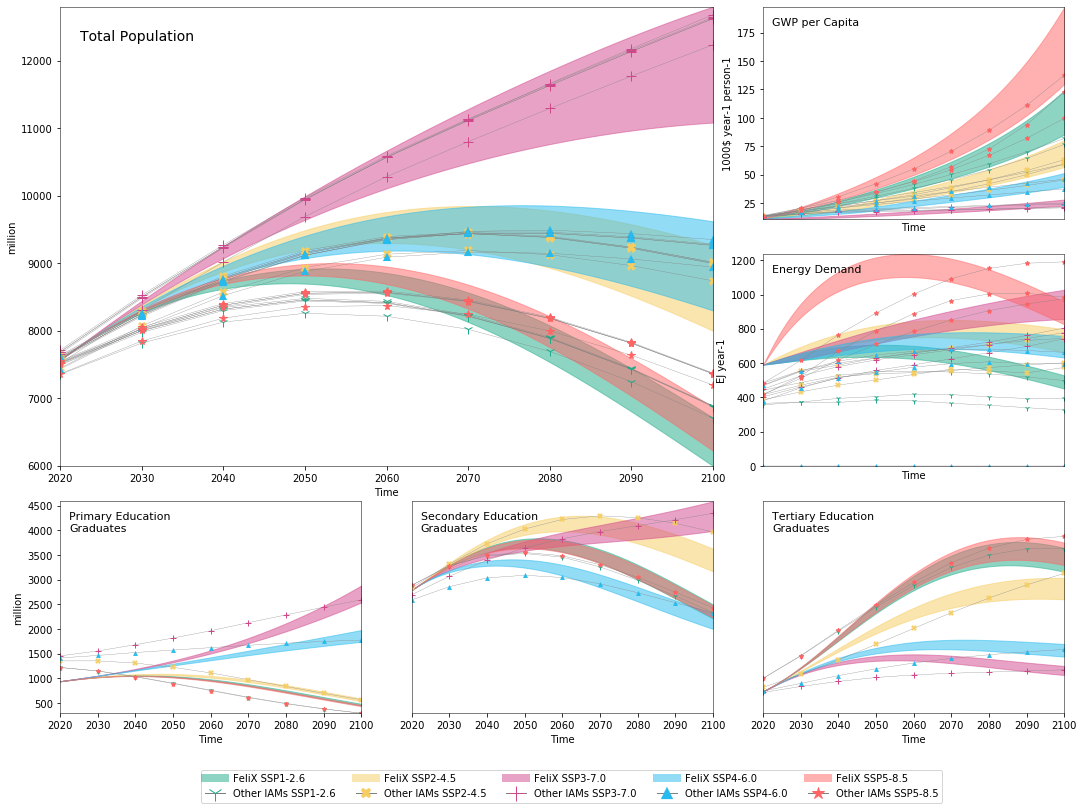

In [184]:
# Develop the  summary calibration plots for Population

import string

# Create grids and axes
fig = plt.figure(figsize=(18, 13))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 6
fig_cols = 6

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.4, wspace=0.4)

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:4, 0:4])
ax[1] = fig.add_subplot(grid[4:6, 0:2])
ax[2] = fig.add_subplot(grid[4:6, 2:4], sharey=ax[1])
ax[3] = fig.add_subplot(grid[4:6, 4:6], sharey=ax[1])
ax[4] = fig.add_subplot(grid[2:4, 4:6])
ax[5] = fig.add_subplot(grid[0:2, 4:6])


sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}

# Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
markers = {
 'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
 'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
 'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
 'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
 'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
 }


calib_vars = ['Total Population Indicator', 'Total Primary Education Graduates Indicator',
            'Total Secondary Education Graduates Indicator',
            'Total Tertiary Education Graduates Indicator', 
            'Energy Demand Indicator', 'GWP per Capita Indicator']
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:
                if i > 0:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], marker='', linewidth=0, 
                     color=sc_colors[sc], err_kws={'alpha':.5})
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)))        
        ax[i].legend().set_visible(False)

    if i > 0:
        ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
            
    i+= 1

        
    '''# Add all subplot labels
    fig_label = list(string.ascii_lowercase)
    fig_sc = ['-i', '-ii', '-iii', '-iv', '-v']
    ax[v,s].text(.1, .9, fig_label[v]+fig_sc[s], fontsize=9, fontweight='semibold', rotation=0,
                        horizontalalignment='center', verticalalignment='center', transform=ax[v,s].transAxes)'''
        
    
    # Set plots title only for the first row
    #ax[0,0].set_title(ssp_names[sc], fontsize=11, color='black', pad=12) 
                
# Removing ticks for inner plots                
for i in [4,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)


# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='#1fab89', lw=8, alpha=.5, label='FeliX SSP1-2.6'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='Other IAMs SSP1-2.6', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], color='#f6cd61', lw=8, alpha=.5, label='FeliX SSP2-4.5'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='Other IAMs SSP2-4.5', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], color='#d1478c', lw=8, alpha=.5, label='FeliX SSP3-7.0'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='Other IAMs SSP3-7.0', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], color='#26baee', lw=8, alpha=.5, label='FeliX SSP4-6.0'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='Other IAMs SSP4-6.0', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], color='#ff6464', lw=8, alpha=.5, label='FeliX SSP5-8.5'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='Other IAMs SSP5-8.5', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]


fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .07),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') '''

plt.show()

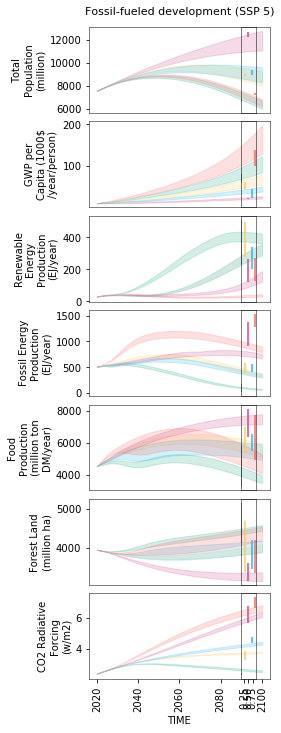

In [92]:
# Develop the  summary calibration plots for the main text

import string

row = 7
fig, ax = plt.subplots(row, 2, figsize=(3, 12), sharex='col', sharey='row', gridspec_kw={'width_ratios': [12, 1]})
fig.subplots_adjust(hspace=0.1, wspace=-.3)

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}



calib_vars = ['Total Population Indicator', 'GWP per Capita Indicator', 'Renewable Energy Production Indicator', 
              'Fossil Energy Production Indicator', 'Food Production Indicator', 'Forest Land Indicator', 
              'CO2 Radiative Forcing Indicator'] # 'GWP per Capita Indicator', 'Renewable Energy Production Indicator', 'Fossil Energy Production Indicator', 'Food Production Indicator', 'Forest Land Indicator', 'CO2 Radiative Forcing Indicator'


for s, sc in enumerate(scenarios):
    
    # Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour
    markers = {'OECD Env-Growth':["D", 4, .3, '#68b0ab', '#68b0ab'],
     'NCAR':["s", 6, .4, 'white', '#158467'],
     'IIASA-WiC POP':["1", 10, .4, '#e11d74', '#e11d74'],
     'REMIND-MAGPIE':["p", 6, 1, 'white', '#33a02c'],
     'GCAM4':["4", 8, 1, '#e31a1c', '#e31a1c'],
     'WITCH-GLOBIOM':["+", 7, 1, '#fdb462', '#fdb462'],
     'IIASA GDP':["|", 8, 1, '#ff7f00', '#ff7f00'],
     'IMAGE':["X", 6, 1, 'white', '#6a3d9a'],
     'AIM/CGE':["o", 6, 1, 'white', '#0f4c75'],
     'PIK GDP-32':["*", 8, 1, '#f09ae9', '#f09ae9'],
     'MESSAGE-GLOBIOM':["^", 6, 1, 'white', '#00b7c2']}
    
    for v, var in enumerate(calib_vars):
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[v,0], marker='', linewidth=0, 
                     color=sc_colors[sc], err_kws={'alpha':.2})
        #ax[v,0].legend().set_visible(False)
        
        ax[v,0].set_ylabel('\n'.join(wrap(unit_keys[var], 13)))
        
        vlines = []
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:
                vlines.append(dict_var[var][sc][model].loc[13])
        min_line = min(vlines)
        max_line = max(vlines)
                
        #ax[v,1].axhline(y=dict_var[var][sc][model].loc[13], xmin=0, xmax=1,  alpha=1, lw=1.2, c=sc_colors[sc], marker='*')
        ax[v,1].vlines(x=[.1+s*.2], ymin=[min_line], ymax=[max_line], color=sc_colors[sc])
        ax[v,1].patch.set_facecolor((0.0, 1.0, 0.0, 0))
            #ax[v,1].legend().set_visible(False)

        
        '''# Add all subplot labels
        fig_label = list(string.ascii_lowercase)
        fig_sc = ['-i', '-ii', '-iii', '-iv', '-v']
        ax[v,s].text(.1, .9, fig_label[v]+fig_sc[s], fontsize=9, fontweight='semibold', rotation=0,
                            horizontalalignment='center', verticalalignment='center', transform=ax[v,s].transAxes)'''
        
    
    # Set plots title only for the first row
    ax[0,0].set_title(ssp_names[sc], fontsize=11, color='black', pad=12) 
                
# Removing ticks for inner plots                
for i in range(row):
    for j in range(2):
        if i in range(row-1) and j in range(2):
            ax[i, j].tick_params(bottom=False)
        if i in range(row) and j in [1,2,3,4]:
            ax[i, j].tick_params(left=False)
        if i in [row-1] and j in range(5):
            ax[i, j].tick_params(axis='x', rotation=90)    
            
            
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
'''legend_elements = [Line2D([0], [0], color='black', lw=6, alpha=.3, label='FeliX projection'),
                   Line2D([0], [0], marker="D", color='grey', lw=1, label='OECD Env-Growth', markersize=5, markerfacecolor=markers['OECD Env-Growth'][4], markeredgewidth=0, markeredgecolor='white'),
                   Line2D([0], [0], marker="s", color='grey', lw=1, label='NCAR', markersize=5, markerfacecolor=markers['NCAR'][4], markeredgewidth=0, markeredgecolor='white'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='IIASA-WiC POP', markersize=10, markerfacecolor=markers['IIASA-WiC POP'][4], markeredgewidth=1, markeredgecolor=markers['IIASA-WiC POP'][4]),
                   Line2D([0], [0], marker="|", color='grey', lw=1,label='IIASA GDP', markersize=8, markerfacecolor=markers['IIASA GDP'][4], markeredgewidth=1, markeredgecolor=markers['IIASA GDP'][4]),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='PIK GDP-32', markersize=12, markerfacecolor=markers['PIK GDP-32'][4], markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="p", color='grey', lw=1,label='REMIND-MAGPIE', markersize=8, markerfacecolor=markers['REMIND-MAGPIE'][4], markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="4", color='grey', lw=1,label='GCAM4', markersize=8, markerfacecolor=markers['GCAM4'][4], markeredgewidth=1, markeredgecolor=markers['GCAM4'][4]),
                   Line2D([0], [0], marker="o", color='grey', lw=1,label='AIM/CGE', markersize=6, markerfacecolor=markers['AIM/CGE'][4], markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='MESSAGE-GLOBIOM', markersize=8, markerfacecolor=markers['MESSAGE-GLOBIOM'][4], markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='WITCH-GLOBIOM', markersize=8, markerfacecolor=markers['WITCH-GLOBIOM'][4], markeredgewidth=1, markeredgecolor=markers['WITCH-GLOBIOM'][4]),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='IMAGE', markersize=6, markerfacecolor=markers['IMAGE'][4], markeredgewidth=1, markeredgecolor='white')
                  ]'''


#fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.13, .07),  bbox_transform=fig.transFigure, ncol=6)

mpl.rcParams['axes.linewidth'] =.5

'''plt.savefig('{}/SSPs_calibration_plots_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_maintext.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') '''

plt.show()

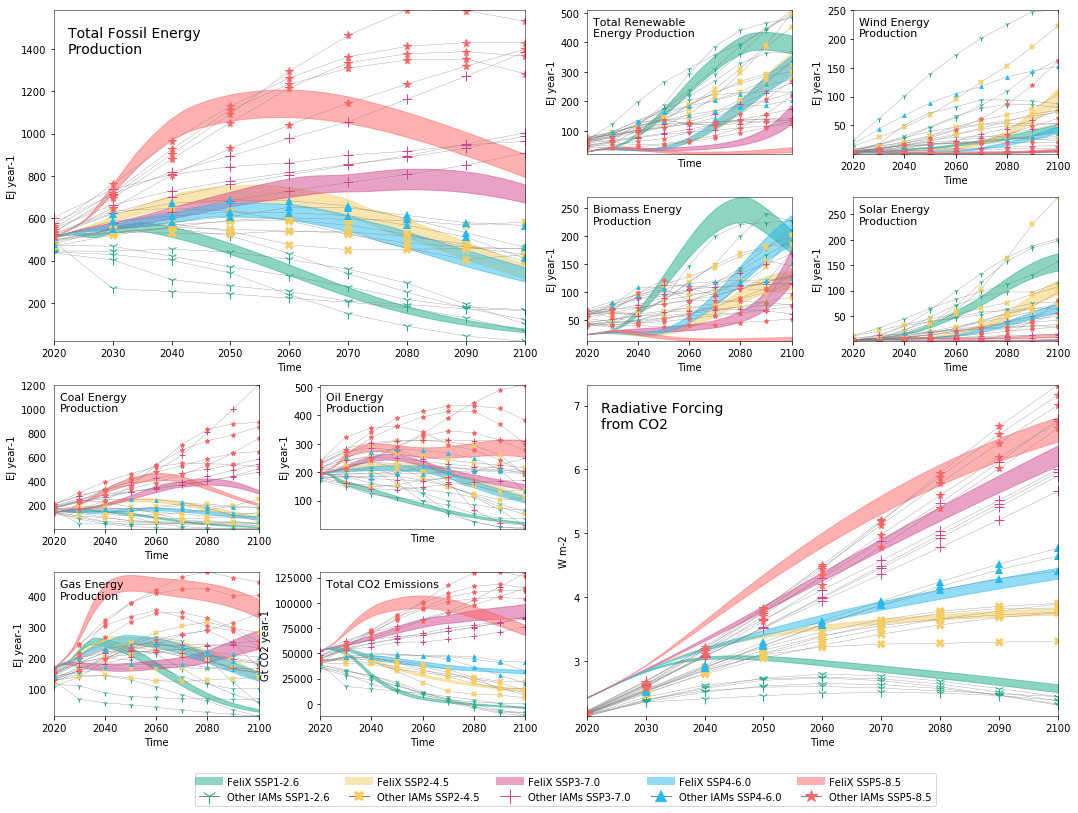

In [183]:
# Develop the  summary calibration plots for energy

import string

# Create grids and axes
fig = plt.figure(figsize=(18, 13))

# The plots will be in n column and am number of rows, depending on the number of indicators
fig_rows = 4
fig_cols = 4

# Set the width ratio of subplots
grid = plt.GridSpec(fig_rows, fig_cols, hspace=0.3, wspace=0.3)

ax = {}

# Create the reference axes for subplots.
ax[0] = fig.add_subplot(grid[0:2, 0:2])
ax[1] = fig.add_subplot(grid[2:4,2:4])
ax[2] = fig.add_subplot(grid[2,0])
ax[3] = fig.add_subplot(grid[3,0])
ax[4] = fig.add_subplot(grid[3,1])
ax[5] = fig.add_subplot(grid[2,1])
ax[6] = fig.add_subplot(grid[0,2])
ax[7] = fig.add_subplot(grid[1,2])
ax[8] = fig.add_subplot(grid[0,3])
ax[9] = fig.add_subplot(grid[1,3])




calib_vars = ['Fossil Energy Production Indicator', 
              'CO2 Radiative Forcing Indicator',
              'Coal Production Indicator' ,
            'Gas Production Indicator',
              'Total CO2 Emissions Indicator',
            'Oil Production Indicator',
             'Renewable Energy Production Indicator', 
            'Biomass Energy Production Indicator',
            'Wind Energy Production Indicator',
            'Solar Energy Production Indicator'
            ]
i = 0
for v, var in enumerate(calib_vars):
    for s, sc in enumerate(scenarios):       
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i], marker='', linewidth=0, 
                     color=sc_colors[sc], err_kws={'alpha':.5})
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:                  
                if i > 1:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                                 markersize=markers[sc][1]*.6, markeredgewidth=markers[sc][2],
                                                                 markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                                 color='grey', linewidth=.3
                                                                 )
                else:
                    dict_var[var][sc].plot( 'Time', model, ax=ax[i], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        
        ax[i].set_ylabel('\n'.join(wrap(unit_keys[var], 30)))        
        ax[i].legend().set_visible(False)

    if i > 1:
        ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 11, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    else:
        ax[i].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    
    # Remove the whitespace at the beginning and end of  x and y axes
    ax[i].margins(x=0)
    ax[i].margins(y=0)
            
    i+= 1

        
    '''# Add all subplot labels
    fig_label = list(string.ascii_lowercase)
    fig_sc = ['-i', '-ii', '-iii', '-iv', '-v']
    ax[v,s].text(.1, .9, fig_label[v]+fig_sc[s], fontsize=9, fontweight='semibold', rotation=0,
                        horizontalalignment='center', verticalalignment='center', transform=ax[v,s].transAxes)'''
        
    
    # Set plots title only for the first row
    #ax[0,0].set_title(ssp_names[sc], fontsize=11, color='black', pad=12) 
                
# Removing ticks for inner plots                
for i in [6,5]:
    ax[i].tick_params(bottom=False, labelbottom=False)
for i in [2,3]:
    ax[i].tick_params(left=False)



# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.23, .07),  bbox_transform=fig.transFigure, ncol=5)

mpl.rcParams['axes.linewidth'] =.5

plt.savefig('{}/SSPs_calibration_plots_EF_300dpi.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.png'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.svg'.format(r'C:/Users/moallemie/GitHub/Scenario_Modelling/Fig/'), dpi=600,  bbox_inches='tight')

plt.show()

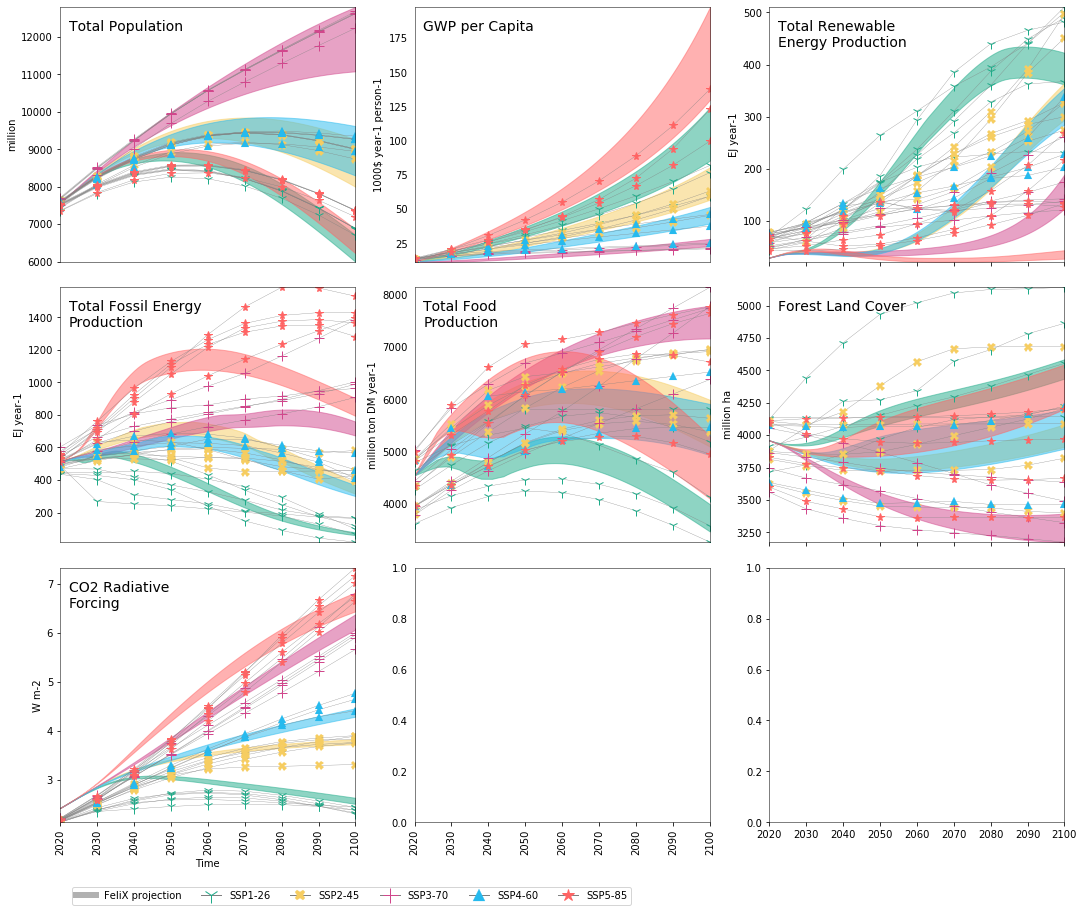

In [129]:
# Develop the  summary calibration plots for the main text

import string

row = 3
fig, ax = plt.subplots(row, 3, figsize=(18, 15), sharex='col')
fig.subplots_adjust(hspace=0.1, wspace=.2)

sc_colors = {'SSP1-26': '#1fab89','SSP2-45':'#f6cd61','SSP3-70':'#d1478c', 'SSP4-60':'#26baee', 'SSP5-85':'#ff6464', 'Historical':'black'}



calib_vars = ['Total Population Indicator', 'GWP per Capita Indicator', 'Renewable Energy Production Indicator', 
              'Fossil Energy Production Indicator', 'Food Production Indicator', 'Forest Land Indicator', 
              'CO2 Radiative Forcing Indicator'] # 'GWP per Capita Indicator', 'Renewable Energy Production Indicator', 'Fossil Energy Production Indicator', 'Food Production Indicator', 'Forest Land Indicator', 'CO2 Radiative Forcing Indicator'


for s, sc in enumerate(scenarios):
    
    # Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour  
    markers = {
     'SSP1-26':["1", 10, 1, '#1fab89', '#1fab89'],
     'SSP2-45':["X", 9, 0, 'white', '#f6cd61'],
     'SSP3-70':["+", 10, 1, '#d1478c', '#d1478c'],
     'SSP4-60':["^", 8, .1, '#26baee', '#26baee'],
     'SSP5-85':["*", 8, 1, '#ff6464', '#ff6464']
     }
    
    i = 0
    j = 0
    for v, var in enumerate(calib_vars):
        
        if j > 2:
            j = 0
            i += 1
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var][sc].columns:
                                   
                dict_var[var][sc].plot( 'Time', model, ax=ax[i,j], marker=markers[sc][0], 
                                                             markersize=markers[sc][1], markeredgewidth=markers[sc][2],
                                                             markerfacecolor=markers[sc][4], markeredgecolor=markers[sc][3], 
                                                             color='grey', linewidth=.3
                                                             )
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[i,j], marker='', linewidth=0, 
                     color=sc_colors[sc], err_kws={'alpha':.5})
        
        ax[i,j].set_ylabel('\n'.join(wrap(unit_keys[var], 30)))        
        ax[i,j].legend().set_visible(False)
        
    
        
        if s == 4:
            ax[i,j].annotate('\n'.join(wrap(title_keys[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
            # Remove the whitespace at the beginning and end of  x and y axes
            ax[i,j].margins(x=0)
            ax[i,j].margins(y=0)
            
        j += 1

        
        '''# Add all subplot labels
        fig_label = list(string.ascii_lowercase)
        fig_sc = ['-i', '-ii', '-iii', '-iv', '-v']
        ax[v,s].text(.1, .9, fig_label[v]+fig_sc[s], fontsize=9, fontweight='semibold', rotation=0,
                            horizontalalignment='center', verticalalignment='center', transform=ax[v,s].transAxes)'''
        
    
    # Set plots title only for the first row
    #ax[0,0].set_title(ssp_names[sc], fontsize=11, color='black', pad=12) 
                
# Removing ticks for inner plots                
for i in range(row):
    for j in range(2):
        if i in range(row-1) and j in range(2):
            ax[i, j].tick_params(bottom=False)
        if i in range(row) and j in [1,2,3,4]:
            ax[i, j].tick_params(left=False)
        if i in [row-1] and j in range(5):
            ax[i, j].tick_params(axis='x', rotation=90)    

# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='black', lw=6, alpha=.3, label='FeliX projection'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='SSP1-26', markersize=markers['SSP1-26'][1]*1.5, markerfacecolor=markers['SSP1-26'][4], markeredgewidth=1, markeredgecolor=markers['SSP1-26'][4]),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='SSP2-45', markersize=markers['SSP2-45'][1]*1.2, markerfacecolor=markers['SSP2-45'][4], markeredgewidth=.2, markeredgecolor=markers['SSP2-45'][4]),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='SSP3-70', markersize=markers['SSP3-70'][1]*1.5, markerfacecolor=markers['SSP3-70'][4], markeredgewidth=1, markeredgecolor=markers['SSP3-70'][4]),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='SSP4-60', markersize=markers['SSP4-60'][1]*1.5, markerfacecolor=markers['SSP4-60'][4], markeredgewidth=.2, markeredgecolor=markers['SSP4-60'][4]),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='SSP5-85', markersize=markers['SSP5-85'][1]*1.5, markerfacecolor=markers['SSP5-85'][4], markeredgewidth=1, markeredgecolor=markers['SSP5-85'][4])   
                  ]


fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.13, .07),  bbox_transform=fig.transFigure, ncol=6)

mpl.rcParams['axes.linewidth'] =.5

'''plt.savefig('{}/SSPs_calibration_plots_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_maintext.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
plt.savefig('{}/SSPs_calibration_plots_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') '''

plt.show()

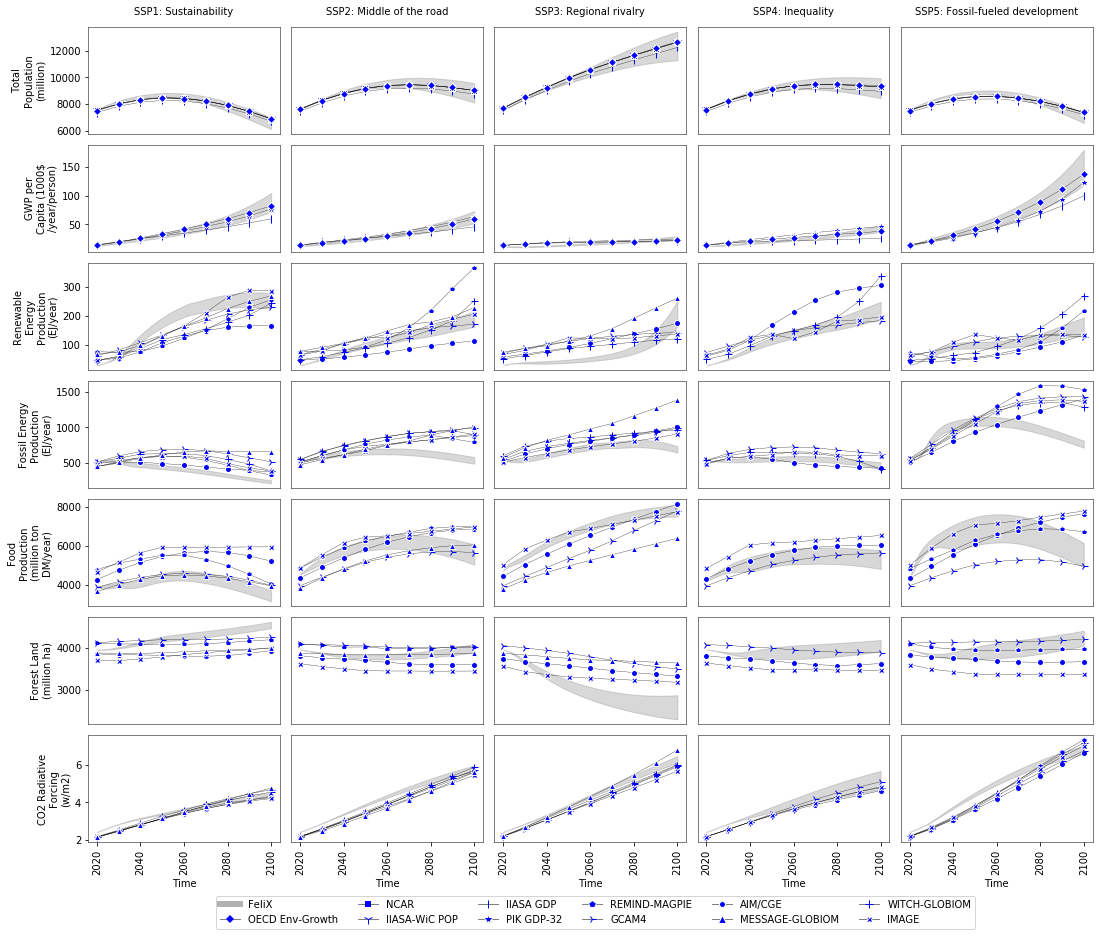

In [343]:
# Develop the  summary plots for the main text

row = 7
fig, ax = plt.subplots(row, 5, figsize=(18, 15), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.06)

calib_vars = ['Total Population Indicator', 'GWP per Capita Indicator',
              'Renewable Energy Production Indicator', 'Fossil Energy Production Indicator', 'Food Production Indicator', 
               'Forest Land Indicator', 'CO2 Radiative Forcing Indicator']


for s, sc in enumerate(['SSP1', 'SSP2', 'SSP3', 'SSP4','SSP5']):
    
    # Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour
    markers = {'OECD Env-Growth':["D", 6, 1, 'white'],
     'NCAR':["s", 6, 1, 'white'],
     'IIASA-WiC POP':["1", 10, 1, 'blue'],
     'REMIND-MAGPIE':["p", 6, 1, 'white'],
     'GCAM4':["4", 8, 1, 'blue'],
     'WITCH-GLOBIOM':["+", 7, 1, 'blue'],
     'IIASA GDP':["|", 8, 1, 'blue'],
     'IMAGE':["X", 6, 1, 'white'],
     'AIM/CGE':["o", 6, 1, 'white'],
     'PIK GDP-32':["*", 9, 1, 'white'],
     'MESSAGE-GLOBIOM':["^", 6, 1, 'white']}
    
    for v, var in enumerate(calib_vars):
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[v,s], marker='', linewidth=0, 
                     color='grey', err_kws={'alpha':.3})
        #ax[v,s].legend().set_visible(False)
        
        ax[v,0].set_ylabel('\n'.join(wrap(unit_keys[var], 13)))
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var]['{}-Baseline'.format(sc)].columns:
                dict_var[var]['{}-Baseline'.format(sc)].plot( 'Time', model, ax=ax[v,s], marker=markers[model][0], 
                                                             markersize=markers[model][1], markeredgewidth=markers[model][2],
                                                             markerfacecolor='blue', markeredgecolor=markers[model][3], 
                                                             color='black', linewidth=.3)
                ax[v,s].legend().set_visible(False)

    # Set plots title only for the first row
    ax[0,s].set_title(ssp_names[sc], fontsize=10, color='black', pad=12) 
                
# Removing ticks for inner plots                
for i in range(row):
    for j in range(5):
        if i in range(row-1) and j in range(5):
            ax[i, j].tick_params(bottom=False)
        if i in range(row) and j in [1,2,3,4]:
            ax[i, j].tick_params(left=False)
        if i in [row-1] and j in range(5):
            ax[i, j].tick_params(axis='x', rotation=90)    
            
            
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='black', lw=6, alpha=.3, label='FeliX'),
                   Line2D([0], [0], marker="D", color='grey', lw=1, label='OECD Env-Growth', markersize=6, markerfacecolor='blue', markeredgewidth=0, markeredgecolor='white'),
                   Line2D([0], [0], marker="s", color='grey', lw=1, label='NCAR', markersize=6, markerfacecolor='blue', markeredgewidth=0, markeredgecolor='white'),
                   Line2D([0], [0], marker="1", color='grey', lw=1, label='IIASA-WiC POP', markersize=10, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='blue'),
                   Line2D([0], [0], marker="|", color='grey', lw=1,label='IIASA GDP', markersize=8, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='blue'),
                   Line2D([0], [0], marker="*", color='grey', lw=1,label='PIK GDP-32', markersize=10, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="p", color='grey', lw=1,label='REMIND-MAGPIE', markersize=8, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="4", color='grey', lw=1,label='GCAM4', markersize=8, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='blue'),
                   Line2D([0], [0], marker="o", color='grey', lw=1,label='AIM/CGE', markersize=6, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="^", color='grey', lw=1,label='MESSAGE-GLOBIOM', markersize=8, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="+", color='grey', lw=1,label='WITCH-GLOBIOM', markersize=8, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='blue'),
                   Line2D([0], [0], marker="X", color='grey', lw=1,label='IMAGE', markersize=6, markerfacecolor='blue', markeredgewidth=1, markeredgecolor='white')
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.22, .08),  bbox_transform=fig.transFigure, ncol=6)

mpl.rcParams['axes.linewidth'] =.5


#plt.savefig('{}/SSPs_calibration_plots_300dpi.png'.format(r'C:/Users/moallemie/EM_analysis/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_600dpi.png'.format(r'C:/Users/moallemie/EM_analysis/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_600dpi.pdf'.format(r'C:/Users/moallemie/EM_analysis/Fig/'), dpi=300,  bbox_inches='tight') 

plt.show()

In [196]:
outcomes_dict['SSP5']['CO2 Radiative Forcing Indicator'].max()

6.077204

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


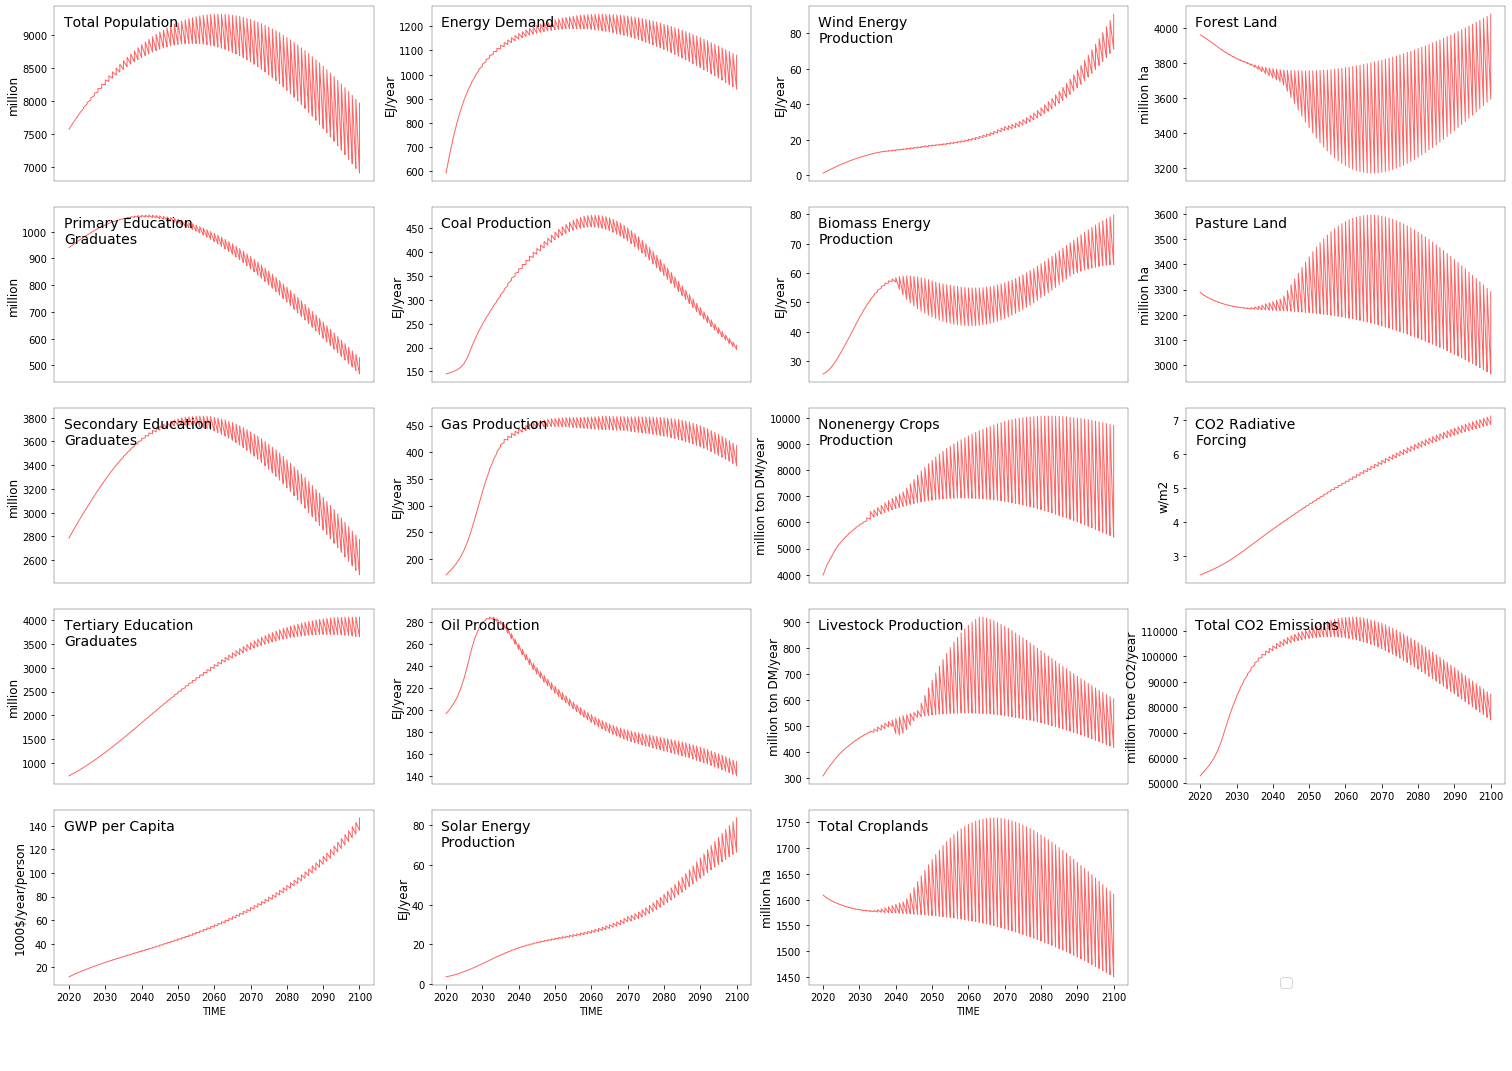

In [158]:
# Ploting Felix SSP projections across outcome variables with their historical data.

from textwrap import wrap

# Import Felix model generated projections. 
directory = 'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Data/Vensim_calibration/' 
ssps_felix = {}
for s, sc in enumerate(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']):
    ssps_felix[sc] = pd.read_csv(directory+"{}_FeliX.csv".format(sc))
    ssps_felix[sc] = ssps_felix[sc].set_index('Time').transpose()
    ssps_felix[sc]['Time'] = ssps_felix[sc].index
    ssps_felix[sc].rename(columns={'CO2 Radiative Forcing': 'CO2 Radiative Forcing Indicator', 'Time':'TIME'}, inplace=True)

# Customise y-axis label names to include the units
y_labels = {'Total Population Indicator':'million', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'1000$/year/person',
             'Energy Demand Indicator': 'EJ/year',
             'Coal Production Indicator':'EJ/year', 
              'Gas Production Indicator':'EJ/year', 
              'Oil Production Indicator':'EJ/year', 
              'Solar Energy Production Indicator':'EJ/year', 
              'Wind Energy Production Indicator':'EJ/year', 
            'Biomass Energy Production Indicator':'EJ/year',
             'Nonenergy Crops Production Indicator':'million ton DM/year', 
              'Livestock Production Indicator':'million ton DM/year',  
              'Total Croplands Indicator':'million ha', 
             'Forest Land Indicator':'million ha', 
              'Pasture Land Indicator':'million ha', 
              'CO2 Radiative Forcing Indicator': 'w/m2',
             'Total CO2 Emissions Indicator': 'million tone CO2/year'}

# Customise plot titles
titles = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Production', 
              'Gas Production Indicator':'Gas Production', 
              'Oil Production Indicator':'Oil Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Nonenergy Crops Production Indicator':'Nonenergy Crops Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Total Croplands Indicator':'Total Croplands', 
             'Forest Land Indicator':'Forest Land', 
              'Pasture Land Indicator':'Pasture Land', 
              'CO2 Radiative Forcing Indicator': 'CO2 Radiative Forcing',
             'Total CO2 Emissions Indicator': 'Total CO2 Emissions'}

 
    
#sc_colors = {'SSP1': '#27706B','SSP2':'#DFDCD4','SSP3':'#FFC3AF', 'SSP4':'#DF6589', 'SSP5':'#EBA23E', 'Historical':'grey'}
#sc_colors = {'SSP1': '#A8C653','SSP2':'#DFDCD4','SSP3':'#FCCF61', 'SSP4':'#32645C', 'SSP5':'#B65748', 'Historical':'grey'}
#sc_colors = {'SSP1': '#49b462','SSP2':'grey','SSP3':'#DA274D', 'SSP4':'#F8D586', 'SSP5':'#274C71', 'Historical':'black'}
sc_colors = {'SSP1': '#1fab89','SSP2':'#f6cd61','SSP3':'#d1478c', 'SSP4':'#26baee', 'SSP5':'#ff6464', 'Historical':'black'}

fig, axes = plt.subplots(5, 4, figsize=(26, 18), sharex='col')
fig.subplots_adjust(hspace=0.15, wspace=0.18)

i = 0
j = 0
for v, var in enumerate(list(y_labels.keys())):
    if i == 5:
        i = 0
        j += 1
    for s, sc in enumerate(['SSP5']):
        #ssps_felix[sc].plot( 'TIME', var, ax=axes[i,j], marker='',
                                                         #color=sc_colors[sc], linewidth=2)
        sns.lineplot(x='TIME', y=var,  
                     estimator=None, data=outcomes_dict[sc], ax=axes[i,j], marker='',linewidth=1, color=sc_colors[sc])
    axes[i,j].legend().set_visible(False)
    axes[i,j].set_ylabel(y_labels[var], size=12, labelpad=2)
    axes[i,j].annotate('\n'.join(wrap(titles[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    i += 1

axes[4,3].axis('off')

# Removing ticks for inner plots                
for i in range(4):
    for j in range(4):
        axes[i, j].tick_params(bottom=False)
axes[3, 3].tick_params(axis='x', reset=True, top=False)

# Create a single legend for all subplots
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=1, fontsize=14, 
           bbox_to_anchor=(0.69, 0.064), fancybox=True, borderaxespad=0)

#plt.savefig('{}/SSPs_Felix_plots_600dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 


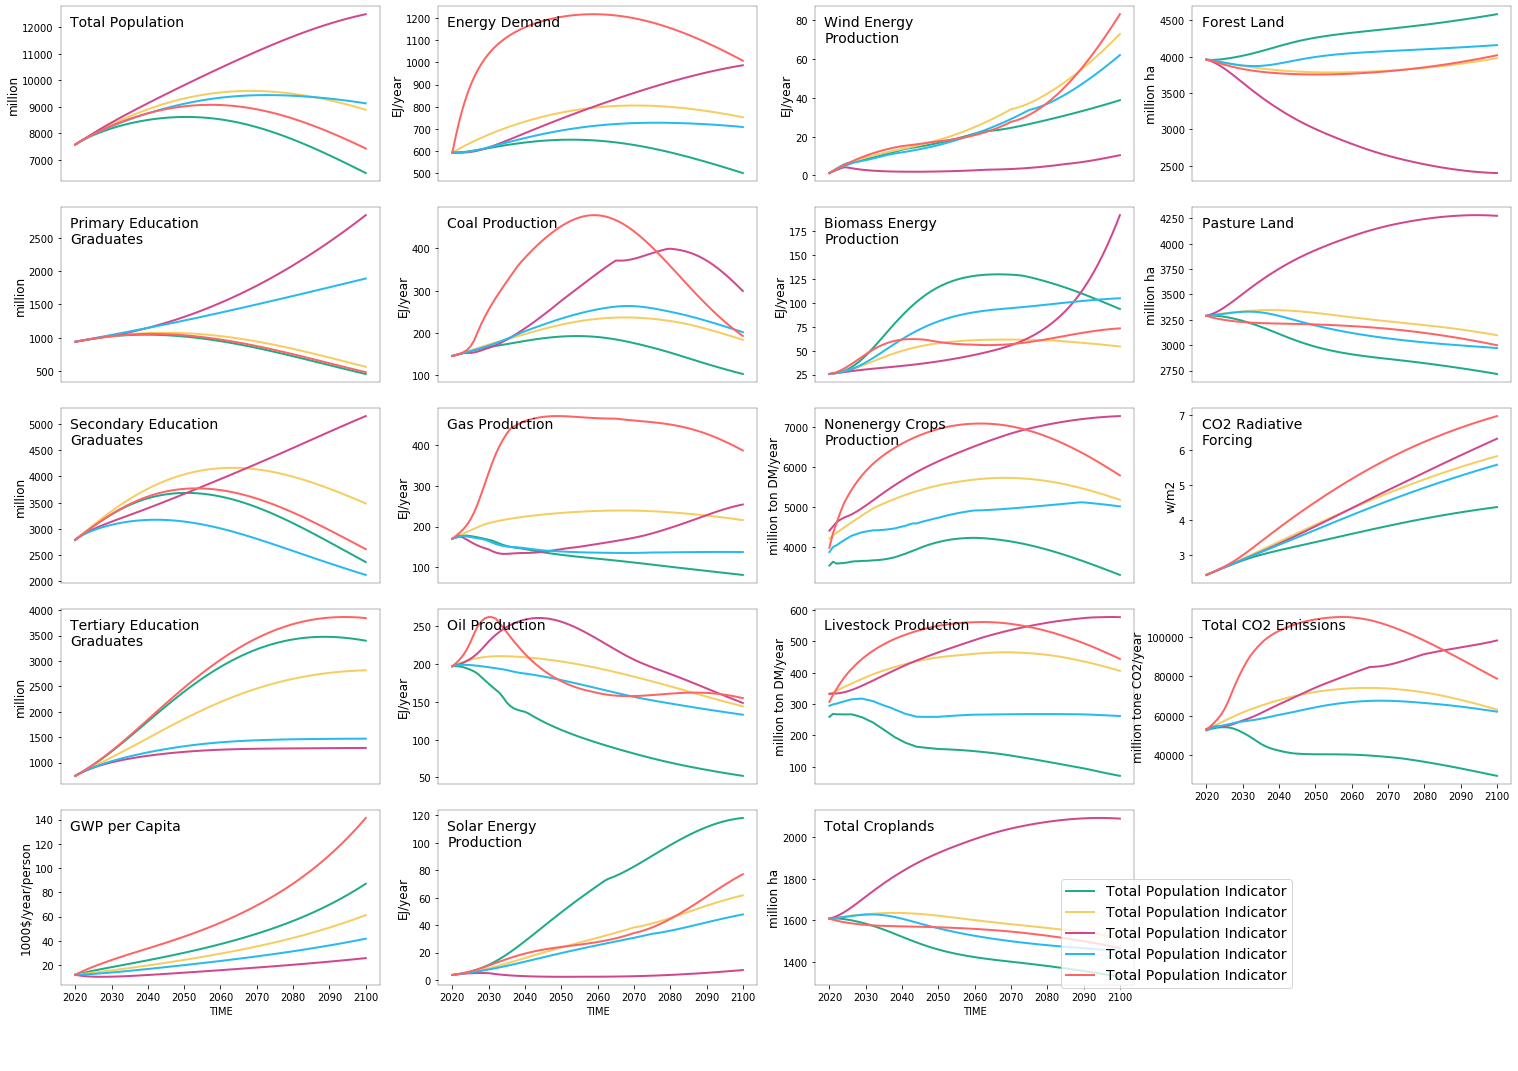

In [143]:
# Ploting Felix SSP projections across outcome variables with their historical data.

from textwrap import wrap

# Import Felix model generated projections. 

directory = 'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Data/Vensim_calibration/' 

ssps_felix = {}
for s, sc in enumerate(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']):
    ssps_felix[sc] = pd.read_csv(directory+"{}_FeliX.csv".format(sc))
    ssps_felix[sc] = ssps_felix[sc].set_index('Time').transpose()
    ssps_felix[sc]['Time'] = ssps_felix[sc].index
    ssps_felix[sc].rename(columns={'CO2 Radiative Forcing': 'CO2 Radiative Forcing Indicator', 'Time':'TIME'}, inplace=True)

# Customise y-axis label names to include the units
y_labels = {'Total Population Indicator':'million', 
             'Total Primary Education Graduates Indicator':'million',
             'Total Secondary Education Graduates Indicator':'million',
              'Total Tertiary Education Graduates Indicator':'million', 
              'GWP per Capita Indicator':'1000$/year/person',
             'Energy Demand Indicator': 'EJ/year',
             'Coal Production Indicator':'EJ/year', 
              'Gas Production Indicator':'EJ/year', 
              'Oil Production Indicator':'EJ/year', 
              'Solar Energy Production Indicator':'EJ/year', 
              'Wind Energy Production Indicator':'EJ/year', 
            'Biomass Energy Production Indicator':'EJ/year',
             'Nonenergy Crops Production Indicator':'million ton DM/year', 
              'Livestock Production Indicator':'million ton DM/year',  
              'Total Croplands Indicator':'million ha', 
             'Forest Land Indicator':'million ha', 
              'Pasture Land Indicator':'million ha', 
              'CO2 Radiative Forcing Indicator': 'w/m2',
             'Total CO2 Emissions Indicator': 'million tone CO2/year'}

# Customise plot titles
titles = {'Total Population Indicator':'Total Population', 
             'Total Primary Education Graduates Indicator':'Primary Education Graduates',
             'Total Secondary Education Graduates Indicator':'Secondary Education Graduates',
              'Total Tertiary Education Graduates Indicator':'Tertiary Education Graduates', 
              'GWP per Capita Indicator':'GWP per Capita',
             'Energy Demand Indicator': 'Energy Demand',
             'Coal Production Indicator':'Coal Production', 
              'Gas Production Indicator':'Gas Production', 
              'Oil Production Indicator':'Oil Production', 
              'Solar Energy Production Indicator':'Solar Energy Production', 
              'Wind Energy Production Indicator':'Wind Energy Production', 
            'Biomass Energy Production Indicator':'Biomass Energy Production',
             'Nonenergy Crops Production Indicator':'Nonenergy Crops Production', 
              'Livestock Production Indicator':'Livestock Production',  
              'Total Croplands Indicator':'Total Croplands', 
             'Forest Land Indicator':'Forest Land', 
              'Pasture Land Indicator':'Pasture Land', 
              'CO2 Radiative Forcing Indicator': 'CO2 Radiative Forcing',
             'Total CO2 Emissions Indicator': 'Total CO2 Emissions'}

 
    
#sc_colors = {'SSP1': '#27706B','SSP2':'#DFDCD4','SSP3':'#FFC3AF', 'SSP4':'#DF6589', 'SSP5':'#EBA23E', 'Historical':'grey'}
#sc_colors = {'SSP1': '#A8C653','SSP2':'#DFDCD4','SSP3':'#FCCF61', 'SSP4':'#32645C', 'SSP5':'#B65748', 'Historical':'grey'}
#sc_colors = {'SSP1': '#49b462','SSP2':'grey','SSP3':'#DA274D', 'SSP4':'#F8D586', 'SSP5':'#274C71', 'Historical':'black'}
sc_colors = {'SSP1': '#1fab89','SSP2':'#f6cd61','SSP3':'#d1478c', 'SSP4':'#26baee', 'SSP5':'#ff6464', 'Historical':'black'}

fig, axes = plt.subplots(5, 4, figsize=(26, 18), sharex='col')
fig.subplots_adjust(hspace=0.15, wspace=0.18)

i = 0
j = 0
for v, var in enumerate(list(y_labels.keys())):
    if i == 5:
        i = 0
        j += 1
    for s, sc in enumerate(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']):
        ssps_felix[sc].plot( 'TIME', var, ax=axes[i,j], marker='',
                                                         color=sc_colors[sc], linewidth=2)
        #sns.lineplot(x='TIME', y=var,  
                     #estimator=None, data=outcomes_dict[sc], ax=axes[i,j], marker='',linewidth=1, color=sc_colors[sc])
    axes[i,j].legend().set_visible(False)
    axes[i,j].set_ylabel(y_labels[var], size=12, labelpad=2)
    axes[i,j].annotate('\n'.join(wrap(titles[var], 20)), size= 14, xy=(0.03, .95), xycoords='axes fraction', ha='left', va='top')
    i += 1

axes[4,3].axis('off')

# Removing ticks for inner plots                
for i in range(4):
    for j in range(4):
        axes[i, j].tick_params(bottom=False)
axes[3, 3].tick_params(axis='x', reset=True, top=False)

# Create a single legend for all subplots
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=1, fontsize=14, 
           bbox_to_anchor=(0.69, 0.064), fancybox=True, borderaxespad=0)

#plt.savefig('{}/SSPs_Felix_plots_600dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 


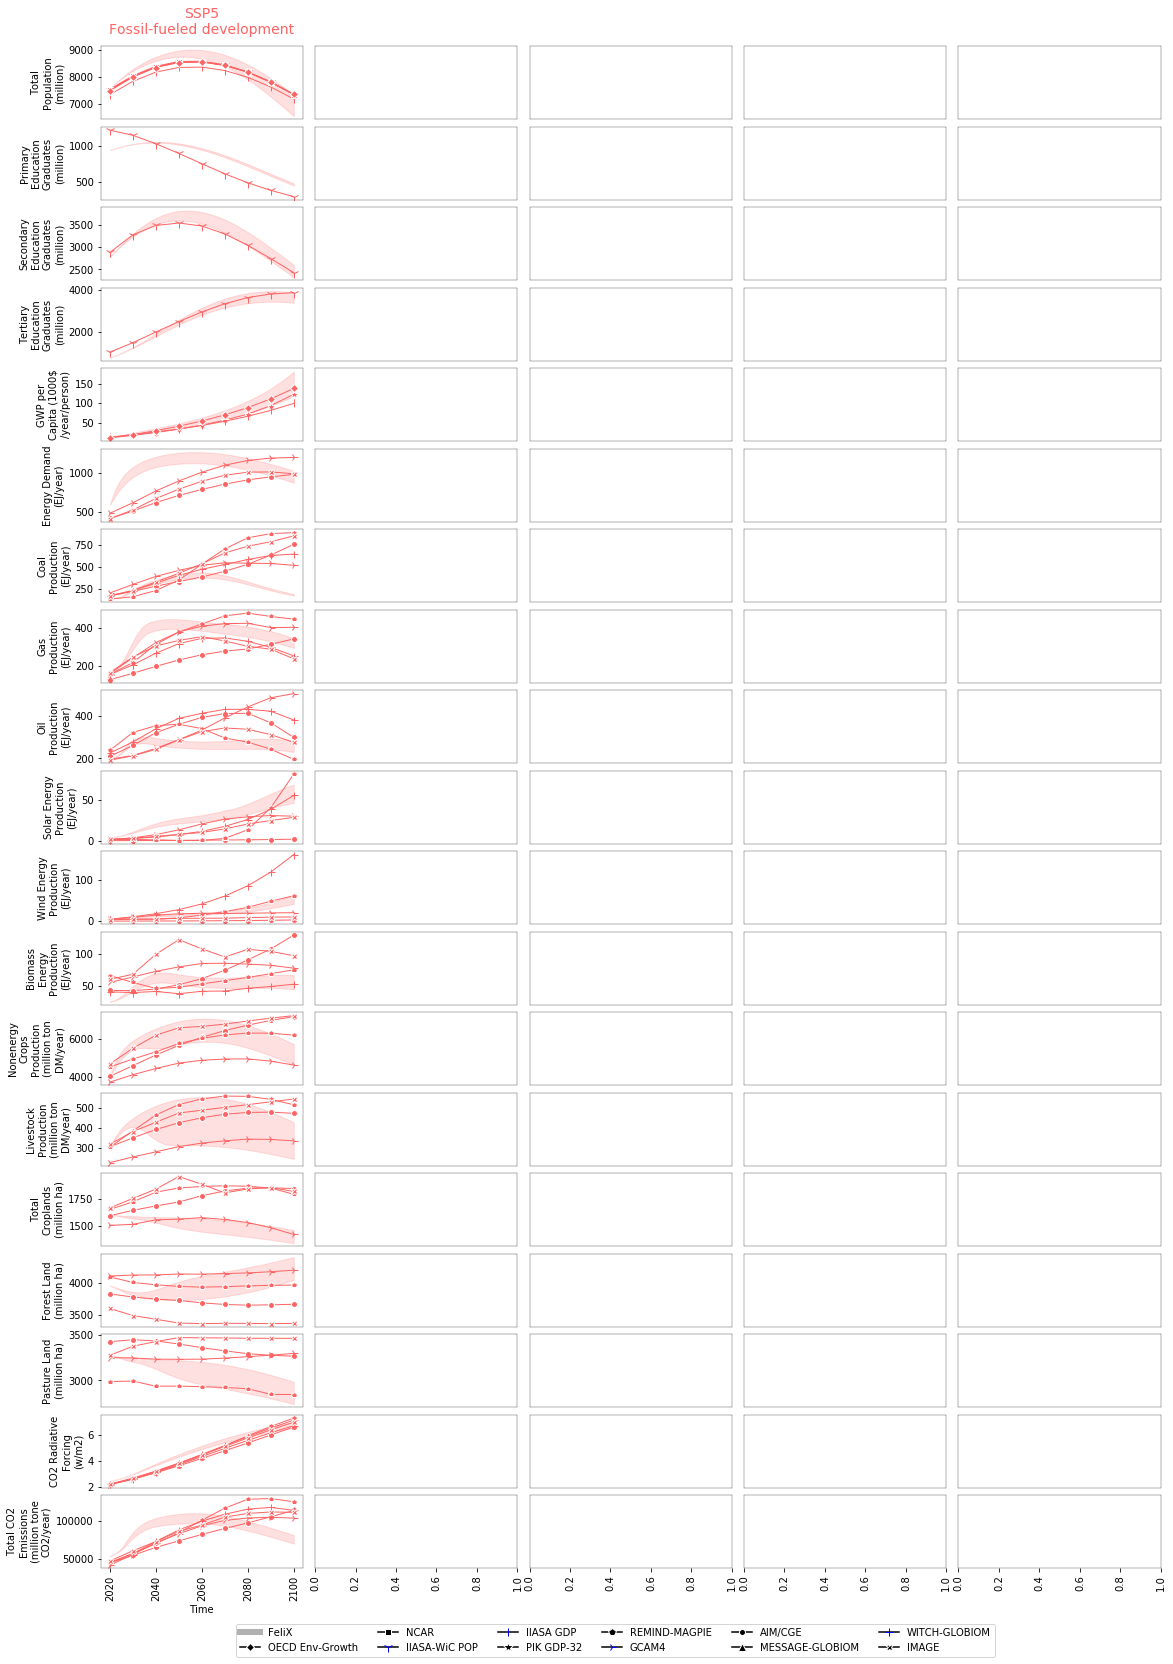

In [294]:
# Plot Felix SSP projections against other IAMs projections across all output variables
fig, ax = plt.subplots(19, 5, figsize=(19, 28), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.06)

calib_vars = ['Total Population Indicator',
 'Total Primary Education Graduates Indicator',
 'Total Secondary Education Graduates Indicator',
 'Total Tertiary Education Graduates Indicator',
 'GWP per Capita Indicator',
 'Energy Demand Indicator',
 'Coal Production Indicator',
 'Gas Production Indicator',
 'Oil Production Indicator',
 'Solar Energy Production Indicator',
 'Wind Energy Production Indicator',
 'Biomass Energy Production Indicator',
 'Nonenergy Crops Production Indicator',
 'Livestock Production Indicator',
 'Total Croplands Indicator',
 'Forest Land Indicator',
 'Pasture Land Indicator',
 'CO2 Radiative Forcing Indicator',
 'Total CO2 Emissions Indicator']


for s, sc in enumerate(['SSP5']): #
    
    # Marker dictionary: the first is marker stye, the second is marker size, the third is marker edge size, the fourth is marker edge colour
    markers = {'OECD Env-Growth':["D", 6, 1, 'white'],
     'NCAR':["s", 6, 1, 'white'],
     'IIASA-WiC POP':["1", 10, 1, sc_colors[sc]],
     'REMIND-MAGPIE':["p", 6, 1, 'white'],
     'GCAM4':["4", 8, 1, sc_colors[sc]],
     'WITCH-GLOBIOM':["+", 7, 1, sc_colors[sc]],
     'IIASA GDP':["|", 8, 1, sc_colors[sc]],
     'IMAGE':["X", 6, 1, 'white'],
     'AIM/CGE':["o", 6, 1, 'white'],
     'PIK GDP-32':["*", 9, 1, 'white'],
     'MESSAGE-GLOBIOM':["^", 6, 1, 'white']}
    
    for v, var in enumerate(calib_vars):
        
        # Renaming is for replacing var name with the model name (FeliX) for having fig legends with model name
        dict_sc_felix2 = outcomes_dict[sc].rename(columns={var:'FeliX'})
        sns.lineplot(x='TIME', y='FeliX', err_style="band", ci='sd', 
                     estimator=np.mean, data=dict_sc_felix2, ax=ax[v,s], marker='', linewidth=0, color=sc_colors[sc])
        #ax[v,s].legend().set_visible(False)
        
        ax[v,0].set_ylabel('\n'.join(wrap(unit_keys[var], 13)))
        
        for model in list(set(sc_models+pop_models+gdp_models)):
            if model in dict_var[var]['{}-Baseline'.format(sc)].columns:
                dict_var[var]['{}-Baseline'.format(sc)].plot( 'Time', model, ax=ax[v,s], marker=markers[model][0], 
                                                             markersize=markers[model][1], markeredgewidth=markers[model][2],
                                                             markerfacecolor=sc_colors[sc], markeredgecolor=markers[model][3], 
                                                             color=sc_colors[sc], linewidth=1)
                ax[v,s].legend().set_visible(False)

    # Set plots title only for the first row
    ax[0,s].set_title(ssp_names[sc], fontsize=14, color=sc_colors[sc], pad=12) 
                
# Removing ticks for inner plots                
for i in range(19):
    for j in range(5):
        if i in range(18) and j in range(5):
            ax[i, j].tick_params(bottom=False)
        if i in range(19) and j in [1,2,3,4]:
            ax[i, j].tick_params(left=False)
        if i in [18] and j in range(5):
            ax[i, j].tick_params(axis='x', rotation=90)    
            
            
# Change the color of legends and have a single unified color legend box for all subplots across SSPs 
legend_elements = [Line2D([0], [0], color='black', lw=6, alpha=.3, label='FeliX'),
                   Line2D([0], [0], marker="D", color='black', label='OECD Env-Growth', markersize=6, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="s", color='black', label='NCAR', markersize=6, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="1", color='black', label='IIASA-WiC POP', markersize=10, markerfacecolor='black', markeredgewidth=1, markeredgecolor='b'),
                   Line2D([0], [0], marker="|", color='black', label='IIASA GDP', markersize=8, markerfacecolor='black', markeredgewidth=1, markeredgecolor='b'),
                   Line2D([0], [0], marker="*", color='black', label='PIK GDP-32', markersize=10, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="p", color='black', label='REMIND-MAGPIE', markersize=8, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="4", color='black', label='GCAM4', markersize=8, markerfacecolor='black', markeredgewidth=1, markeredgecolor='b'),
                   Line2D([0], [0], marker="o", color='black', label='AIM/CGE', markersize=6, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="^", color='black', label='MESSAGE-GLOBIOM', markersize=8, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white'),
                   Line2D([0], [0], marker="+", color='black', label='WITCH-GLOBIOM', markersize=8, markerfacecolor='black', markeredgewidth=1, markeredgecolor='b'),
                   Line2D([0], [0], marker="X", color='black', label='IMAGE', markersize=6, markerfacecolor='black', markeredgewidth=1, markeredgecolor='white')
                  ]

fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.22, .1),  bbox_transform=fig.transFigure, ncol=6)

mpl.rcParams['axes.linewidth'] = .3


#plt.savefig('{}/SSPs_calibration_plots_300dpi.png'.format(r'C:/Users/moallemie/EM_analysis/Fig/'), dpi=300,  bbox_inches='tight') 
#plt.savefig('{}/SSPs_calibration_plots_600dpi.png'.format(r'C:/Users/moallemie/EM_analysis/Fig/'), dpi=600,  bbox_inches='tight') 

plt.show()